In [1]:
pip install openai

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.6/73.6 kB 3.6 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as snsb
import plotly.express as px
import plotly.graph_objects as go
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score
from sklearn.metrics.pairwise import cosine_similarity
import warnings
import openai

# Feature choosing

Feature description

In [3]:
acronyms = {"Rk": "Rank", "Player": "Player's name", "Nation": "Player's nation", "Pos": "Position",
            "Squad": "Squad’s name", "Comp": "League that squat occupies", "Age": "Player's age",
            "Born": "Year of birth", "MP": "Matches played", "Starts": "Matches started",
            "Min": "Minutes played", "90s": "Minutes played divided by 90", 
            "Goals": "Goals scored or allowed", 
            "Shots": "Shots total (Does not include penalty kicks)", 
            "SoT": "Shots on target (Does not include penalty kicks)", 
            'SoT%': 'Shots on target percentage (Does not include penalty kicks)',
            'G/Sh': 'Goals per shot', 
            'G/SoT': 'Goals per shot on target (Does not include penalty kicks)', 
            'ShoDist': 'Average distance, in yards, from goal of all shots taken (Does not include penalty kicks)',
            'ShoFK': 'Shots from free kicks', 
            'ShoPK': 'Penalty kicks made',
            "PasProg":"Completed passes that move the ball towards the opponent's goal at least 10 yards from its furthest point in the last six passes, or any completed pass into the penalty area",
                  "PasAtt":"Passes attempted",
                  "PasLive":"Live-ball passes",
                  "PasDead":"Dead-ball passes",
                  "PasFK":"Passes attempted from free kicks",
                  "TB":"Completed pass sent between back defenders into open space",
                  "Sw":"Passes that travel more than 40 yards of the width of the pitch",
                  "PasCrs":"Crosses",
                  "TI":"Throw-Ins taken",
                  "CK":"Corner kicks",
                  "CkIn":"Inswinging corner kicks",
                  "CkOut":"Outswinging corner kicks",
                  "CkStr":"Straight corner kicks",
                  "PasCmp":"Passes completed",
                  "PasOff":"Offsides",
                  "PasBlocks":"Blocked by the opponent who was standing it the path",
                  "SCA":"Shot-creating actions",
                  "ScaPassLive":"Completed live-ball passes that lead to a shot attempt",
                  "ScaPassDead":"Completed dead-ball passes that lead to a shot attempt",
                  "ScaDrib":"Successful dribbles that lead to a shot attempt",
                  "ScaSh":"Shots that lead to another shot attempt",
                  "ScaFld":"Fouls drawn that lead to a shot attempt",
                  "ScaDef":"Defensive actions that lead to a shot attempt",
                  "GCA":"Goal-creating actions",
                  "GcaPassLive":"Completed live-ball passes that lead to a goal",
                  "GcaPassDead":"Completed dead-ball passes that lead to a goal",
                  "GcaDrib":"Successful dribbles that lead to a goal",
                  "GcaSh":"Shots that lead to another goal-scoring shot",
                  "GcaFld":"Fouls drawn that lead to a goal",
                  "GcaDef":"Defensive actions that lead to a goal",
                  "Tkl":"Number of players tackled",
                  "TklWon":"Tackles in which the tackler's team won possession of the ball",
                  "TklDef3rd":"Tackles in defensive 1/3",
                  "TklMid3rd":"Tackles in middle 1/3",
                  "TklAtt3rd":"Tackles in attacking 1/3",
                  "TklDri":"Number of dribblers tackled",
                  "TklDriAtt":"Number of times dribbled past plus number of tackles",
                  "TklDri%":"Percentage of dribblers tackled",
                  "TklDriPast":"Number of times dribbled past by an opposing player",
                  "Blocks":'Number of times blocking the ball by standing in its path',
                 'BlkSh':'Number of times blocking a shot by standing in its path',
            'PKatt': 'Penalty kicks attempted', 
            'PasTotCmp': 'Passes completed', 
            'PasTotAtt': 'Passes attempted', 
            'PasTotCmp%': 'Pass completion percentage', 
            'PasTotDist': 'Total distance, in yards, that completed passes have traveled in any direction',
            'PasTotPrgDist': 'Total distance, in yards, that completed passes have traveled towards the opponent\'s goal',
            'PasShoCmp': 'Passes completed (Passes between 5 and 15 yards)', 
            'PasShoAtt': 'Passes attempted (Passes between 5 and 15 yards)', 
            'PasShoCmp%': 'Pass completion percentage (Passes between 5 and 15 yards)',
            'PasMedCmp': 'Passes completed (Passes between 15 and 30 yards)', 
            'PasMedAtt': 'Passes attempted (Passes between 15 and 30 yards)', 
            'PasMedCmp%': 'Pass completion percentage (Passes between 15 and 30 yards)',
            'PasLonCmp': 'Passes completed (Passes longer than 30 yards)', 
            'PasLonAtt': 'Passes attempted (Passes longer than 30 yards)', 
            'PasLonCmp%': 'Pass completion percentage (Passes longer than 30 yards)',
            'Assists': 'Assists', 
            'PasAss': 'Passes that directly lead to a shot (assisted shots)', 
            'Pas3rd': 'Completed passes that enter the 1/3 of the pitch closest to the goal',
             "PPA" : "Completed passes into the 18-yard box",
            "CrsPA" : "Completed crosses into the 18-yard box",
           "BlkPass":"Number of times blocking a pass by standing in its path",
                  "Int":"Interceptions",
                  "Tkl+Int":"Number of players tackled plus number of interceptions",
                  "Clr":"Clearances",
                  "Err":"Mistakes leading to an opponent's shot",
                  "Touches":"Number of times a player touched the ball. Note: Receiving a pass, then dribbling, then sending a pass counts as one touch",
                  "TouDefPen":"Touches in defensive penalty area",
                  "TouDef3rd":"Touches in defensive 1/3",
                  "TouMid3rd":"Touches in middle 1/3",
                  "TouAtt3rd":"Touches in attacking 1/3",
                  "TouAttPen":"Touches in attacking penalty area",
                  "TouLive":"Live-ball touches. Does not include corner kicks, free kicks, throw-ins, kick-offs, goal kicks or penalty kicks.",
                  "ToAtt":"Number of attempts to take on defenders while dribbling",
                  "ToSuc":"Number of defenders taken on successfully, by dribbling past them",
                  "ToSuc%":"Percentage of take-ons Completed Successfully",
                  "ToTkl":"Number of times tackled by a defender during a take-on attempt",
                  "ToTkl%":"Percentage of time tackled by a defender during a take-on attempt",
                  "Carries":"Number of times the player controlled the ball with their feet",
                  "CarTotDist":"Total distance, in yards, a player moved the ball while controlling it with their feet, in any direction",
                  "CarPrgDist":"Total distance, in yards, a player moved the ball while controlling it with their feet towards the opponent's goal",
                  "CarProg":"Carries that move the ball towards the opponent's goal at least 5 yards, or any carry into the penalty area",
                  "Car3rd":"Carries that enter the 1/3 of the pitch closest to the goal",
                  "CPA":"Carries into the 18-yard box",
                  "CarMis":"Number of times a player failed when attempting to gain control of a ball",
                  "CarDis":"Number of times a player loses control of the ball after being tackled by an opposing player",
                  "Rec":"Number of times a player successfully received a pass",
           "RecProg" : 
            "Completed passes that move the ball towards the opponents goal at least 10 yards from its furthest point in the last six passes, or any completed pass into the penalty area Make this a dictionary",
           "CrdY":"Yellow cards",
                  "CrdR":"Red cards",
                  "2CrdY":"Second yellow card",
                  "Fls":"Fouls committed",
                  "Fld":"Fouls drawn",
                  "Off":"Offsides",
                  "Crs":"Crosses",
                  "TklW":"Tackles in which the tackler's team won possession of the ball",
                  "PKwon":"Penalty kicks won",
                  "PKcon":"Penalty kicks conceded",
                  "OG":"Own goals",
                  "Recov":"Number of loose balls recovered",
                  "AerWon":"Aerials won",
                  "AerLost":"Aerials lost",
                  "AerWon%":"Percentage of aerials won",
           }


In [4]:
general_info = ["Player", "Nation", "Pos", "Squad", "Age", "Born"]
playing_time = ["MP", "Starts", "Min"]
goals_info = ["Goals", "Shots", "SoT", "G/Sh", "G/SoT", "ShoDist", "ShoPK", "PKatt", "GCA", 
              "SCA", "Off", "PKwon", "PKcon"]

passes_info = ["PasTotCmp", "PasTotDist", "PasTotPrgDist", "Assists", 
               "PasAss", "Pas3rd", "PPA", "PasCrs", "CrsPA", "PasAtt", "PasLive", "PasDead", "PasOff",
              "PasBlocks", "Crs"]
skill_info = ["SCA", "ScaDrib", "ScaFld", "ToAtt", "ToSuc", "Carries", "CarTotDist", "CarPrgDist", "Car3rd", 'CPA', "CarMis", "CarDis", "Fld"]
defense_info = ["Tkl", "TklWon", "TklDri", "Blocks", "Int", "Clr", "Err", "CrdY", "CrdR", "Fls", "OG", "Recov", "AerWon", 
             "AerLost"]

In [5]:
goals_bestfeatures = ["Goals", "Shots", "SoT"]
passes_bestfeatures = ["PasTotCmp", "Assists"]
skill_bestfeatures = ["SCA", "ScaDrib"]
defense_bestfeatures = ["Tkl", "Int"]

Full

In [6]:
forward_features = ["Goals", "Shots", "SoT", "G/Sh", "G/SoT", "ShoDist", "GCA", "SCA", "Off", "PKwon", "ScaDrib", "Assists",
                    "ScaPassLive", "Car3rd", "ScaFld", "ToAtt", "ToSuc", "Carries", "CarTotDist", "CarPrgDist", 'CPA', "CarMis", "CarDis"]
midfielder_features = ["Goals","PasTotCmp", "PasTotCmp%", "PasTotDist", "PasTotPrgDist", "Assists", "PasAss", "Pas3rd", "Crs", "PasCmp", 
                       "PasOff", "PasBlocks", "SCA", "ScaPassLive", "ScaPassDead", "ScaDrib", "ScaSh", "ScaFld", "GCA", "GcaPassLive", 
                       "GcaPassDead", "GcaDrib", "GcaSh", "GcaFld", "Tkl", "TklWon", "TklDef3rd", "TklMid3rd", "TklAtt3rd", "TklDri", 
                       "TklDriAtt", "TklDri%", "TklDriPast", "Blocks", "BlkSh", "Int", "Recov", "Carries", "CarTotDist", "CarPrgDist" , "Fld"]
defender_features = ["PasTotCmp", "PasTotDist", "PasTotPrgDist", "Tkl", "TklWon", "TklDef3rd", "TklMid3rd", "TklAtt3rd", "TklDri", "TklDriAtt", "TklDriPast", "Blocks", 
                     "BlkSh", "Int", "Tkl+Int", "Recov", "AerWon", "AerLost", "Carries", "CarTotDist", "CarPrgDist", "CrdY", "CrdR","Fls", "Clr"]

features_sum = ["Goals", "MP", "Starts", "Min", "Assists"]

In [7]:
forward_position = ["FW", "FWMF", "FWDF"]
midfield_position = ["MF", "MFDF", "MFFW"]
defender_position = ["DF", "DFMF", "DFFW"]
positions = forward_position + midfield_position + defender_position

In [8]:
# forward_features_sum = ["Goals", "Shots", "SoT", "PKatt", "GCA", "SCA", "Off", "PKwon", "ScaDrib", 
#                     "ScaPassLive", "Car3rd", "Fld",  "ScaPassLive", "Car3rd"]
# forward_features_max = ["G/Sh", "G/SoT", "ShoDist"]
# midfielder_features_sum = ["PasTotCmp", "PasTotDist", "PasTotPrgDist", "Assists", "PasAss", "Pas3rd", "Crs", "PasCmp", 
#                        "PasOff", "PasBlocks", "SCA", "ScaPassLive", "ScaPassDead", "ScaDrib", "ScaSh", "ScaFld", "GCA", "GcaPassLive", 
#                        "GcaPassDead", "GcaDrib", "GcaSh", "GcaFld", "Tkl", "TklWon", "TklDef3rd", "TklMid3rd", "TklAtt3rd", "TklDri", 
#                        "TklDriAtt", "TklDriPast", "Blocks", "BlkSh", "Int", "Recov"]
# midfielder_features_max = ["PasTotCmp%", "TklDri%"]
# defender_features_sum = ["Tkl", "TklWon", "TklDef3rd", "TklMid3rd", "TklAtt3rd", "TklDri", "TklDriAtt", "TklDri%", "TklDriPast", "Blocks", 
#                      "BlkSh", "Int", "Recov", "AerWon", "AerLost", "AerWon%"]
# defender_features_max = ["AerWon%"]

# Data preprocessing

Making sure that each player will only have 1 entry.

In [9]:
df_2022 = pd.read_csv("/kaggle/input/20222023-football-player-stats/2022-2023 Football Player Stats.csv", encoding='ISO-8859-1', delimiter=';')

Remove goalkeepers

In [10]:
df_2022 = df_2022[df_2022["Pos"] != "GK"]
df_2022.drop(["Rk"], axis=1, inplace=True)

In [11]:
def player_unify(df):
    
    all_players = list(df["Player"].values)
    columns = list(df.columns)
    
    playercnt_dict = {}
    for i in range(len(all_players)):
        if all_players[i] not in playercnt_dict.keys():
            playercnt_dict[all_players[i]] = 1
        else:
            playercnt_dict[all_players[i]] += 1
            
    player_switchclub = []
    for x in playercnt_dict.keys():
        if playercnt_dict[x] >= 2:
            player_switchclub.append(x)
            
    player_new_dict = {}
    df_result = df
    for i in range(len(player_switchclub)):
        player_new = []
        player_old = df[df["Player"] == player_switchclub[i]].values
        for j in range(len(columns)):
            if columns[j] == "Squad":
                new_input = []
                for k in range(player_old.shape[0]):
                    new_input.append(player_old[k, j])
                player_new.append(new_input)
            elif columns[j] == "Squad":
                new_input = ""
                for k in range(player_old.shape[0]):
                    new_input += player_old[k, j]
                    new_input += "/"
                player_new.append(new_input)
            elif columns[j] in features_sum:
                new_input = 0
                for k in range(player_old.shape[0]):
                    new_input += player_old[k, j]
                player_new.append(new_input)
            elif columns[j] in forward_features + midfielder_features + defender_features:
                new_input = 0
                for k in range(player_old.shape[0]):
                    new_input += player_old[k, j]
                new_input /= player_old.shape[0]
                player_new.append(new_input)
            else:
                player_new.append(player_old[0, j])
        player_new_dict[player_switchclub[i]] = player_new
        df_result = df_result.drop(df_result[df_result['Player'] == player_switchclub[i]].index)
    df_unify = pd.DataFrame(player_new_dict)
    df_unify = df_unify.transpose().reset_index(drop=True)
    df_unify.columns = columns
    df_result = pd.concat([df_result, df_unify], axis=0)
    
    return df_result, player_switchclub

In [12]:
df_players, player_switchclub = player_unify(df_2022)
df_players = df_players.reset_index()
df_players.drop("index", axis=1, inplace=True)

Scale that dataframe to model and compare between each player easier

In [13]:
scaler = MinMaxScaler()
df_radar = scaler.fit_transform(df_players[np.unique(playing_time + forward_features + midfielder_features + defender_features)])
df_radar = pd.DataFrame(df_radar)
df_radar.columns = np.unique(playing_time + forward_features + midfielder_features + defender_features)
df_2022.reset_index(drop=True, inplace=True)
df_radar.reset_index(drop=True, inplace=True)
df_radar = pd.concat([df_players[["Player", "Pos", "Comp"]], df_radar], axis=1)

In [14]:
all_players = list(df_radar["Player"].values)
all_leagues = list(np.unique(df_radar["Comp"].values))
all_positions = list(np.unique(df_radar["Pos"].values))

In [15]:
df_players

,Player,Nation,Pos,Squad,Comp,Age,Born,MP,Starts,Min,...,Off,Crs,TklW,PKwon,PKcon,OG,Recov,AerWon,AerLost,AerWon%
0,Brenden Aaronson,USA,MFFW,Leeds United,Premier League,22,2000,20,19,1596,...,0.17,2.54,0.51,0.0,0.0,0.0,4.86,0.34,1.19,22.2
1,Yunis Abdelhamid,MAR,DF,Reims,Ligue 1,35,1987,22,22,1980,...,0.05,0.18,1.59,0.0,0.0,0.0,6.64,2.18,1.23,64.0
2,Himad Abdelli,FRA,MFFW,Angers,Ligue 1,23,1999,14,8,770,...,0.0,1.05,1.4,0.0,0.0,0.0,8.14,0.93,1.05,47.1
3,Salis Abdul Samed,GHA,MF,Lens,Ligue 1,22,2000,20,20,1799,...,0.0,0.35,0.8,0.0,0.0,0.05,6.6,0.5,0.5,50.0
4,Laurent Abergel,FRA,MF,Lorient,Ligue 1,30,1993,15,15,1165,...,0.0,0.23,2.02,0.0,0.0,0.0,6.51,0.31,0.39,44.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2366,Denis Zakaria,SUI,MF,"[Chelsea, Juventus]",Premier League,26,1996,6,5,409,...,0.0,1.07,0.94,0.0,0.0,0.0,4.6,0.0,0.155,0.0
2367,Alessandro Zanoli,ITA,DFMF,"[Sampdoria, Napoli]",Serie A,22,2000,6,0,134,...,0.0,7.5,0.71,0.0,0.0,0.0,2.5,0.355,6.07,25.0
2368,Akim Zedadka,ALG,DF,"[Auxerre, Lille]",Ligue 1,27,1995,14,10,849,...,0.13,2.44,1.82,0.0,0.18,0.0,6.255,1.46,1.365,52.9
2369,Nadir Zortea,ITA,DFMF,"[Atalanta, Sassuolo]",Serie A,23,1999,10,2,312,...,0.0,4.0,2.0,0.0,0.0,0.0,6.3,1.5,1.2,83.3


In [16]:
df_radar

,Player,Pos,Comp,AerLost,AerWon,Assists,BlkSh,Blocks,CPA,Car3rd,...,TklAtt3rd,TklDef3rd,TklDri,TklDri%,TklDriAtt,TklDriPast,TklMid3rd,TklWon,ToAtt,ToSuc
0,Brenden Aaronson,MFFW,Premier League,0.039667,0.0136,0.011,0.011,0.0845,0.026667,0.035667,...,0.028,0.02250,0.02550,0.346,0.049000,0.0960,0.060000,0.02550,0.124333,0.05950
1,Yunis Abdelhamid,DF,Ligue 1,0.041000,0.0872,0.005,0.077,0.1115,0.006000,0.007667,...,0.005,0.07250,0.06600,0.784,0.056000,0.0360,0.066667,0.07950,0.022667,0.01600
2,Himad Abdelli,MFFW,Ligue 1,0.035000,0.0372,0.000,0.012,0.0755,0.031333,0.085333,...,0.023,0.06400,0.08150,0.609,0.089000,0.1050,0.093333,0.07000,0.128000,0.10450
3,Salis Abdul Samed,MF,Ligue 1,0.016667,0.0200,0.000,0.035,0.0650,0.010000,0.065000,...,0.010,0.02750,0.04250,0.654,0.043333,0.0450,0.056667,0.04000,0.041667,0.03500
4,Laurent Abergel,MF,Ligue 1,0.013000,0.0124,0.008,0.023,0.0700,0.000000,0.031000,...,0.000,0.13200,0.06600,0.405,0.108667,0.1940,0.077333,0.10100,0.031000,0.02700
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2366,Denis Zakaria,MF,Premier League,0.005167,0.0000,0.000,0.000,0.0515,0.021000,0.046167,...,0.051,0.03350,0.04350,0.625,0.044667,0.0470,0.105667,0.07700,0.031333,0.03125
2367,Alessandro Zanoli,DFMF,Serie A,0.202333,0.0142,0.000,0.000,0.0000,0.357000,0.178500,...,0.000,0.01775,0.00000,0.000,0.000000,0.0000,0.333333,0.01775,0.035667,0.03575
2368,Akim Zedadka,DF,Ligue 1,0.045500,0.0584,0.000,0.009,0.0465,0.014667,0.049333,...,0.009,0.04750,0.02725,0.375,0.032667,0.0435,0.018333,0.05200,0.067500,0.04650
2369,Nadir Zortea,DFMF,Serie A,0.040000,0.0600,0.000,0.000,0.0650,0.026667,0.146667,...,0.000,0.08000,0.08000,0.875,0.060000,0.0200,0.093333,0.10000,0.156667,0.12500


# EDA

In [17]:
print(df_players.shape)

(2371, 123)


In [18]:
def plot_position(general_position, features, df, max_value):
    fig, axes = plt.subplots(nrows=1, ncols=len(general_position), figsize=(30,5))
    for i in range(len(general_position)):
        data = df[df["Pos"]==general_position[i]][features].mean()
        data_dict = dict(data)
        data = pd.DataFrame.from_dict(data_dict, orient='index', columns=['Mean Value'])
        axes[i].bar(data.index, data['Mean Value'])
        axes[i].set_xticks(range(len(data)))
        axes[i].set_xticklabels(data.index, rotation=90)
        axes[i].set_title(general_position[i])
        axes[i].set_yticks(np.arange(0, max_value + 0.1, 0.1))
    plt.show()

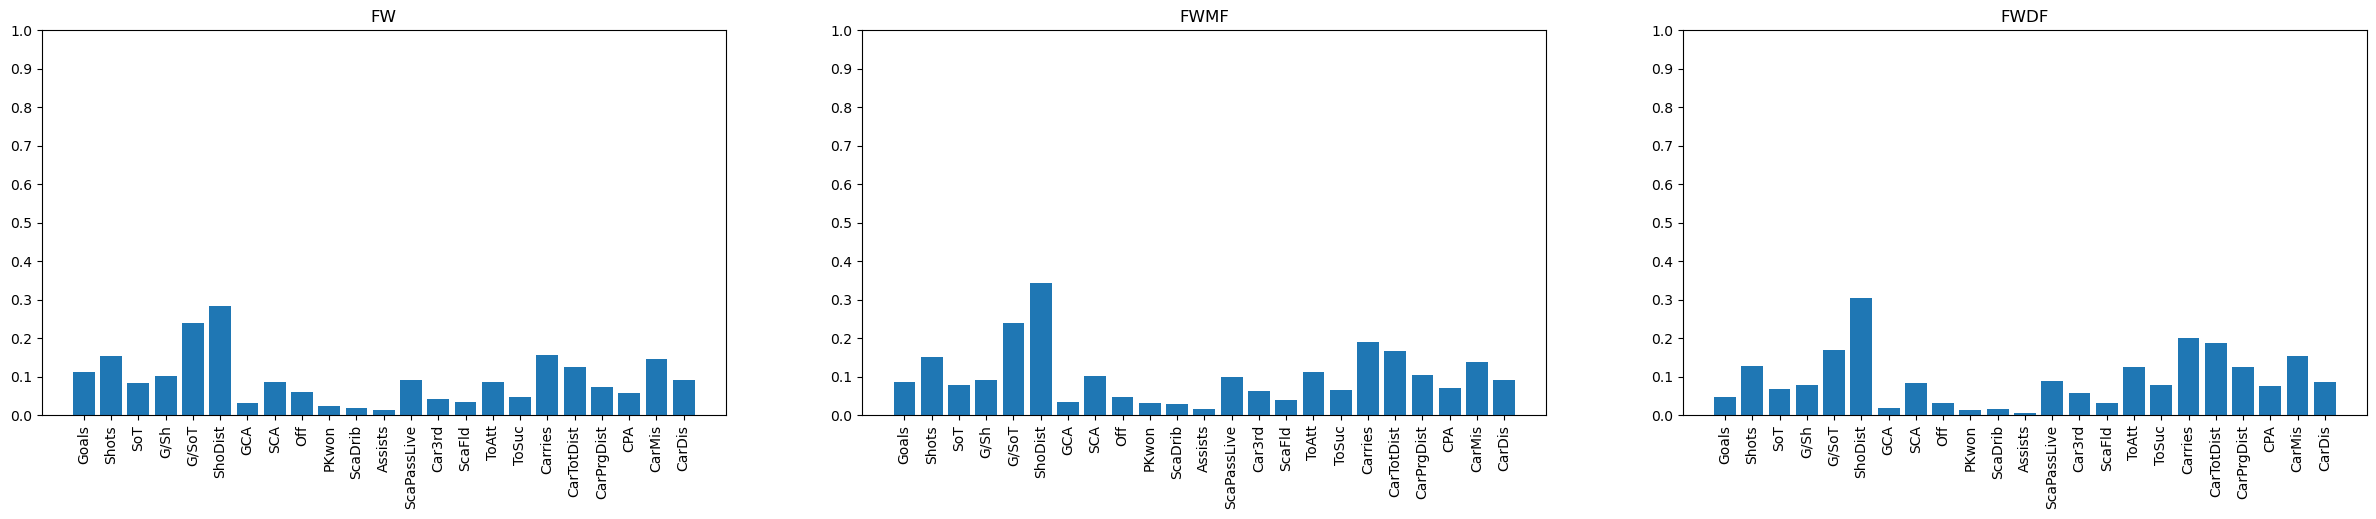

(374, 67)
(226, 67)
(29, 67)


In [19]:
plot_position(forward_position, forward_features, df_radar, 1)
print(df_radar[df_radar["Pos"]=="FW"].shape)
print(df_radar[df_radar["Pos"]=="FWMF"].shape)
print(df_radar[df_radar["Pos"]=="FWDF"].shape)

From this, we can see that each of the forward positions have very similar distribution of the stats. Notably, FW tends to score more goals compare to the other 2 positions due to the fact that the other 2 positions are mix between forward and midfield and especially FWDF which is more of a defensive role than FWMF. Also notice FWMF create more scoring change and shoot from longer distance as expected from the position name.

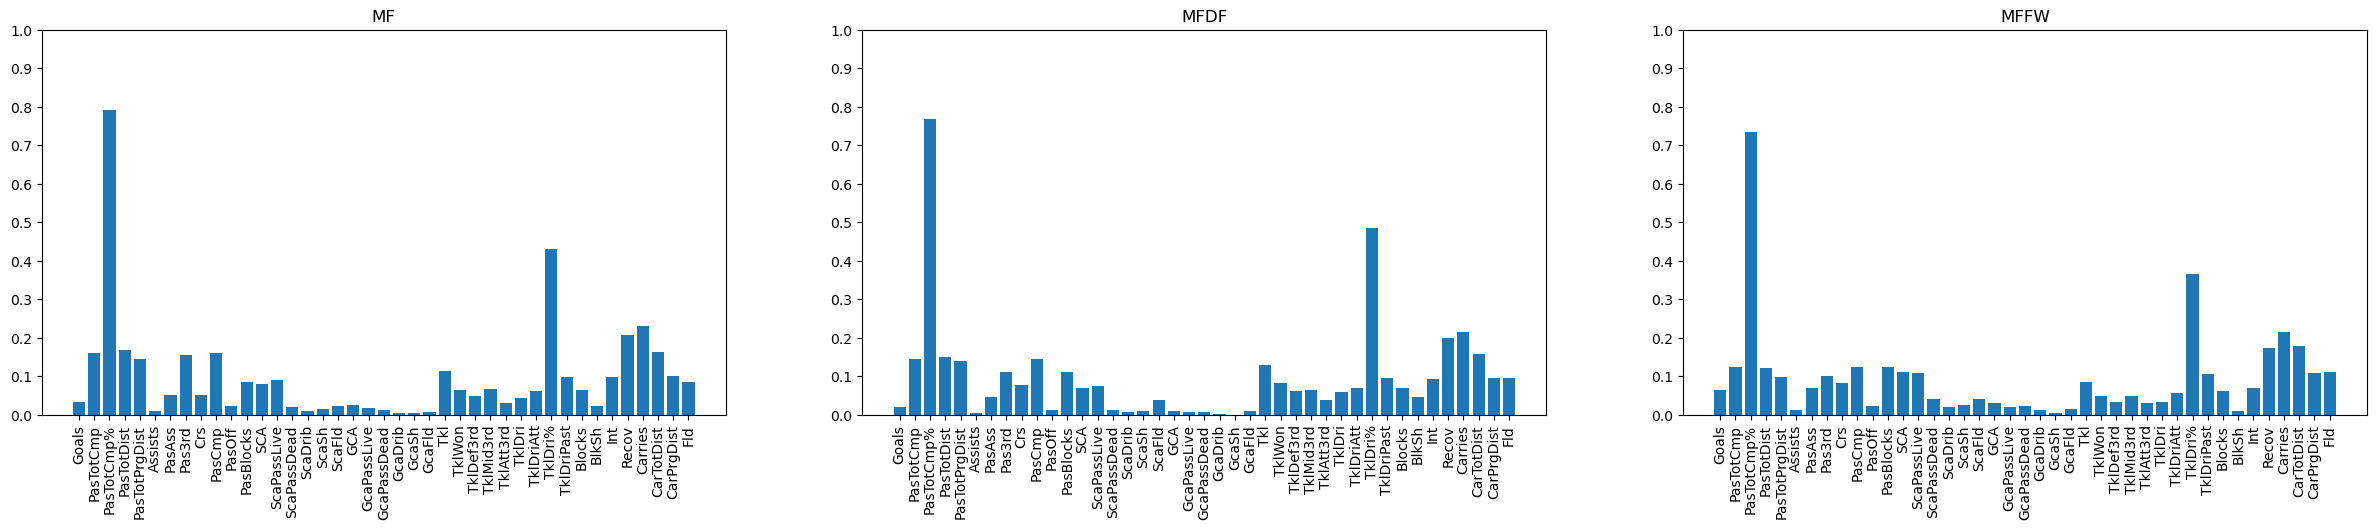

(567, 67)
(59, 67)
(198, 67)


In [20]:
plot_position(midfield_position, midfielder_features, df_radar, 1)
print(df_radar[df_radar["Pos"]=="MF"].shape)
print(df_radar[df_radar["Pos"]=="MFDF"].shape)
print(df_radar[df_radar["Pos"]=="MFFW"].shape)

Nothing too special here as all of these positions looks very similar

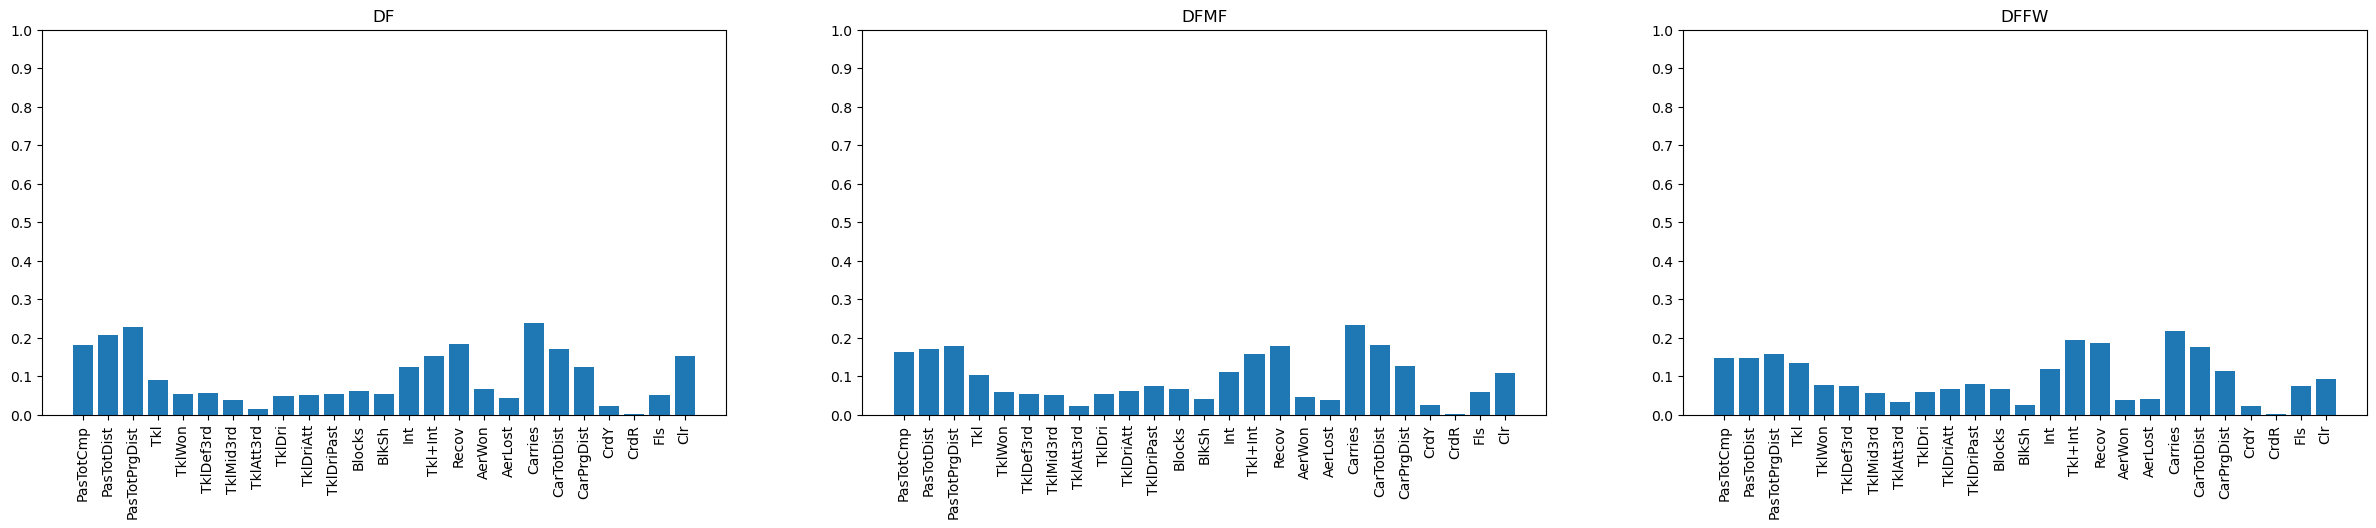

(786, 67)
(96, 67)
(36, 67)


In [21]:
plot_position(defender_position, defender_features, df_radar, 1)
print(df_radar[df_radar["Pos"]=="DF"].shape)
print(df_radar[df_radar["Pos"]=="DFMF"].shape)
print(df_radar[df_radar["Pos"]=="DFFW"].shape)

Also very similar here

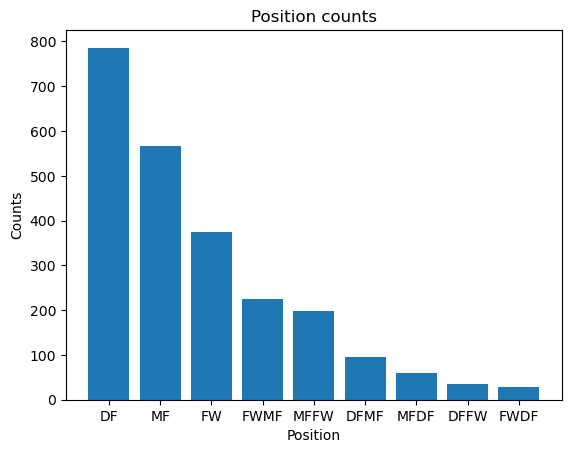

In [22]:
positions_counts = df_radar["Pos"].value_counts()
plt.bar(positions_counts.index, positions_counts.values)
plt.title("Position counts")
plt.xlabel("Position")
plt.ylabel("Counts")
plt.show()

Seems like in Europe top 5 leagues, most players are defenders

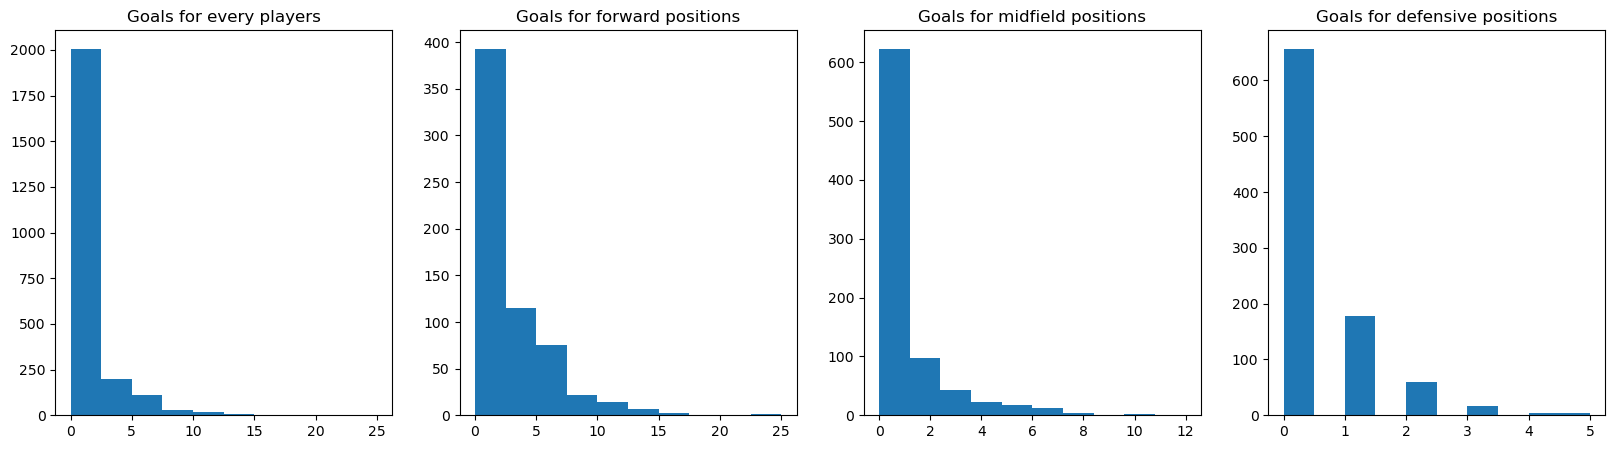

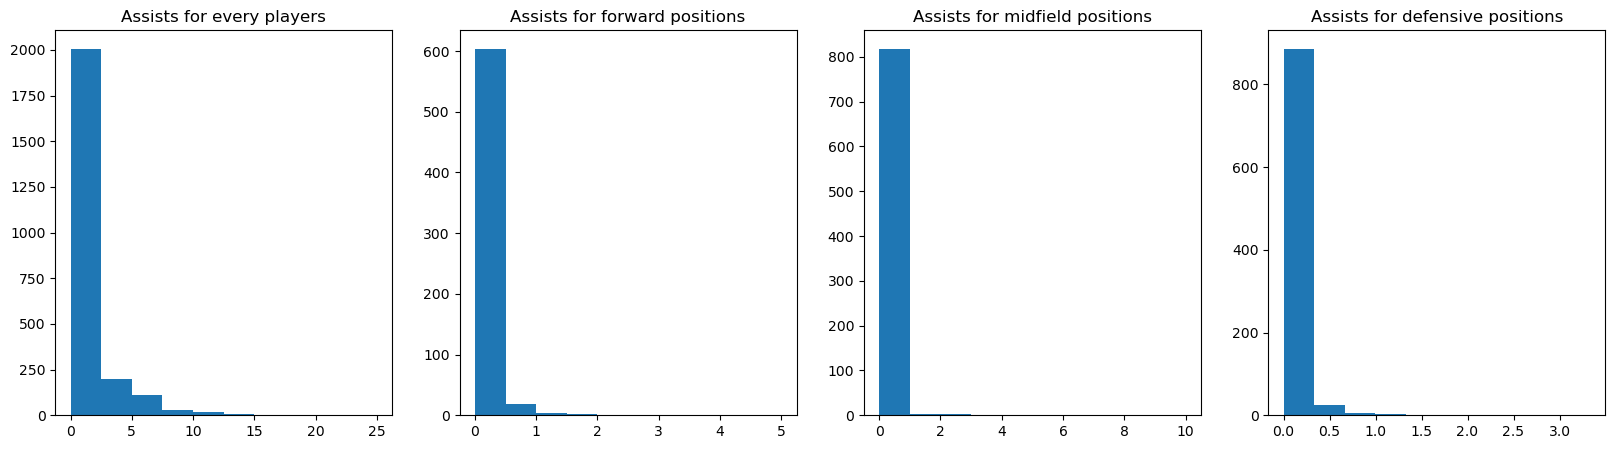

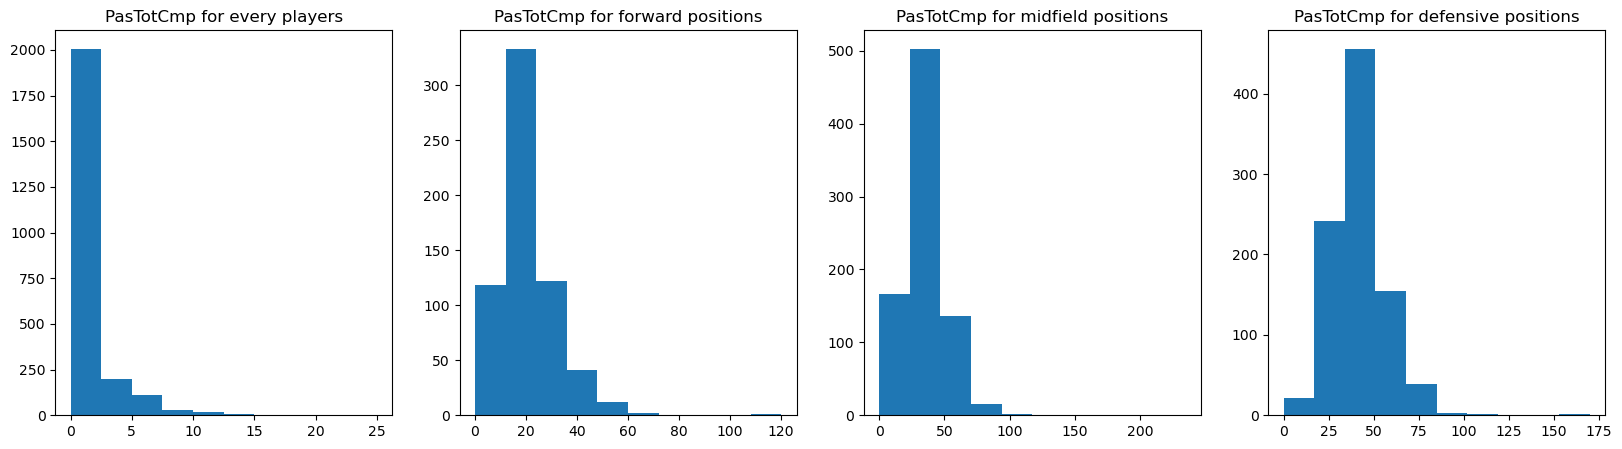

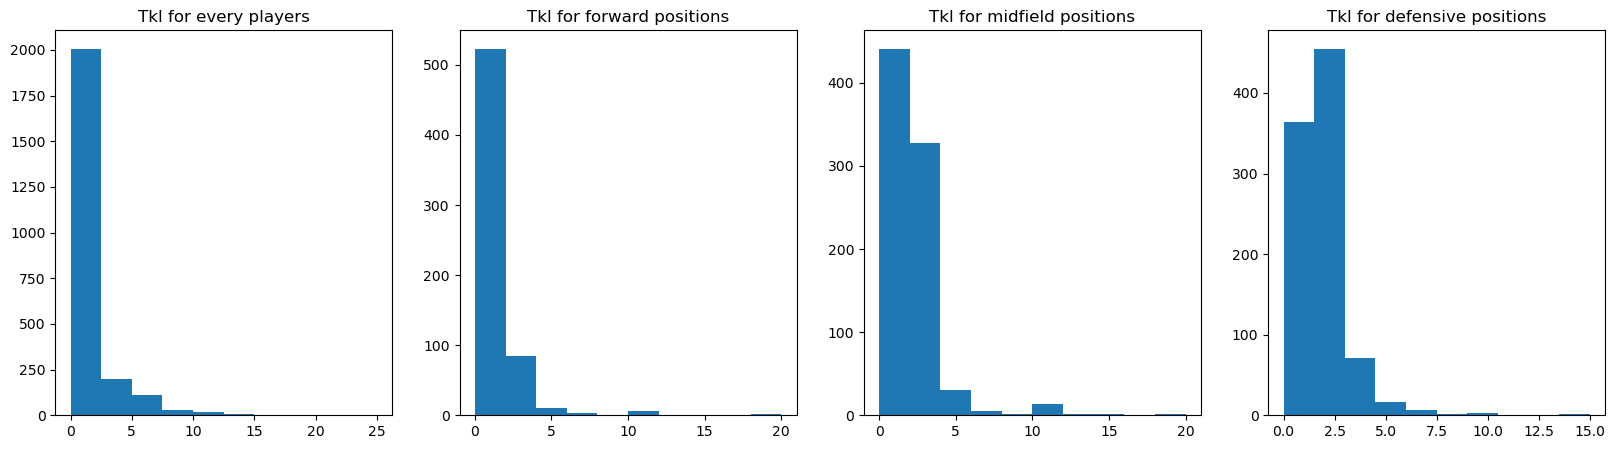

In [23]:
def single_feature_hist(feature):
    fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(20, 5))

    axes[0].hist(df_players["Goals"])
    axes[0].set_title(feature + " for every players")
    axes[1].hist(df_players[(df_players["Pos"]=="FW") | (df_players["Pos"]=="FWMF") | (df_players["Pos"]=="FWDF")][feature].values)
    axes[1].set_title(feature + " for forward positions")
    axes[2].hist(df_players[(df_players["Pos"]=="MF") | (df_players["Pos"]=="MFFW") | (df_players["Pos"]=="MFDF")][feature].values)
    axes[2].set_title(feature + " for midfield positions")
    axes[3].hist(df_players[(df_players["Pos"]=="DF") | (df_players["Pos"]=="DFMF") | (df_players["Pos"]=="DFFW")][feature].values)
    axes[3].set_title(feature + " for defensive positions")
    plt.show()
single_feature_hist("Goals")
single_feature_hist("Assists")
single_feature_hist("PasTotCmp")
single_feature_hist("Tkl")

# Modeling

The idea is grouping similar players with each other and rank each of the cluster by looking at the average stats of each cluster. After testing, I feel like Kmeans is better than agglomerative clustering, so I use it. But here is the code if you want to use kmeans instead

In [24]:
# np.random.seed(1)
# def ac_position(df, position, cluster, features):
#     '''
#     Train a Agglomerative model to cluster players at each position
#     '''
    
#     ac = AgglomerativeClustering(n_clusters=cluster, affinity='euclidean', linkage='complete')
#     df_position = df[(df["Pos"]==position)]
#     position_pred = ac.fit_predict(df_position[features])
#     df_position.loc[:, "Class"] = position_pred
#     return df_position

# def ac_general_position(df, general_position, cluster, features):
#     '''
#     Train a Agglomerative model to cluster players at each general position
#     like striker, midfield, defender, or goalkeeper
#     '''
#     df_positions = []

#     for i in range(len(general_position)):
#         df_position = ac_position(df, general_position[i], cluster, features)
#         df_positions.append(df_position)
#     return df_positions

# df_striker = ac_general_position(df_radar, forward_position, 3, forward_features + playing_time)
# df_midfield = ac_general_position(df_radar, midfield_position, 3, midfielder_features + playing_time)
# df_defender = ac_general_position(df_radar, defender_position, 3, defender_features + playing_time)

KMeans clustering

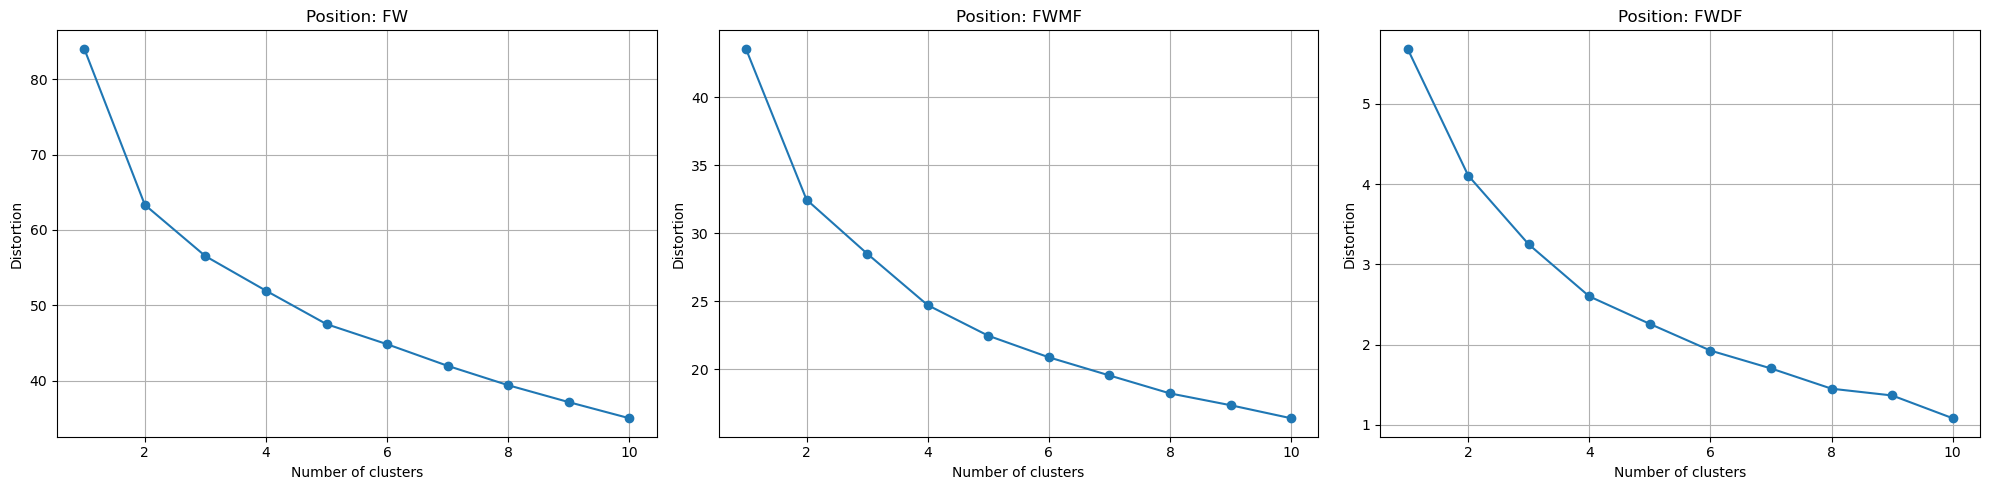

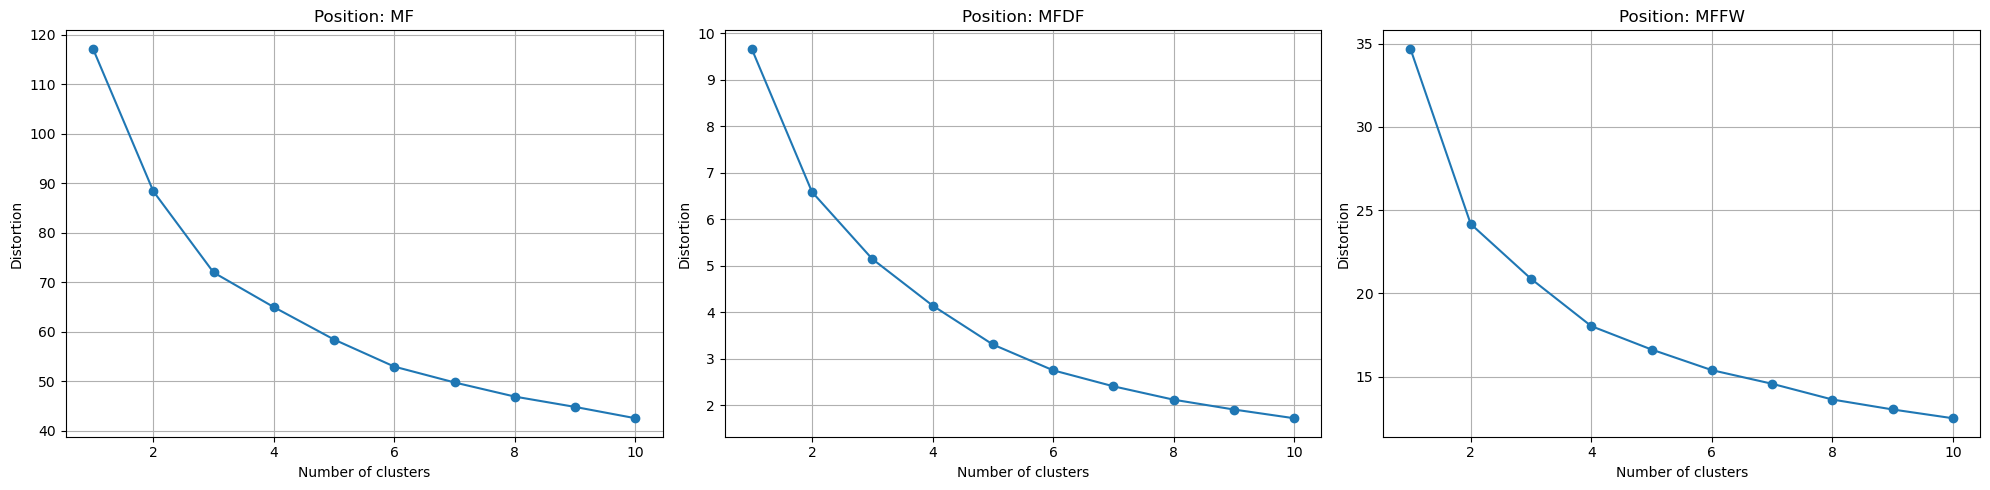

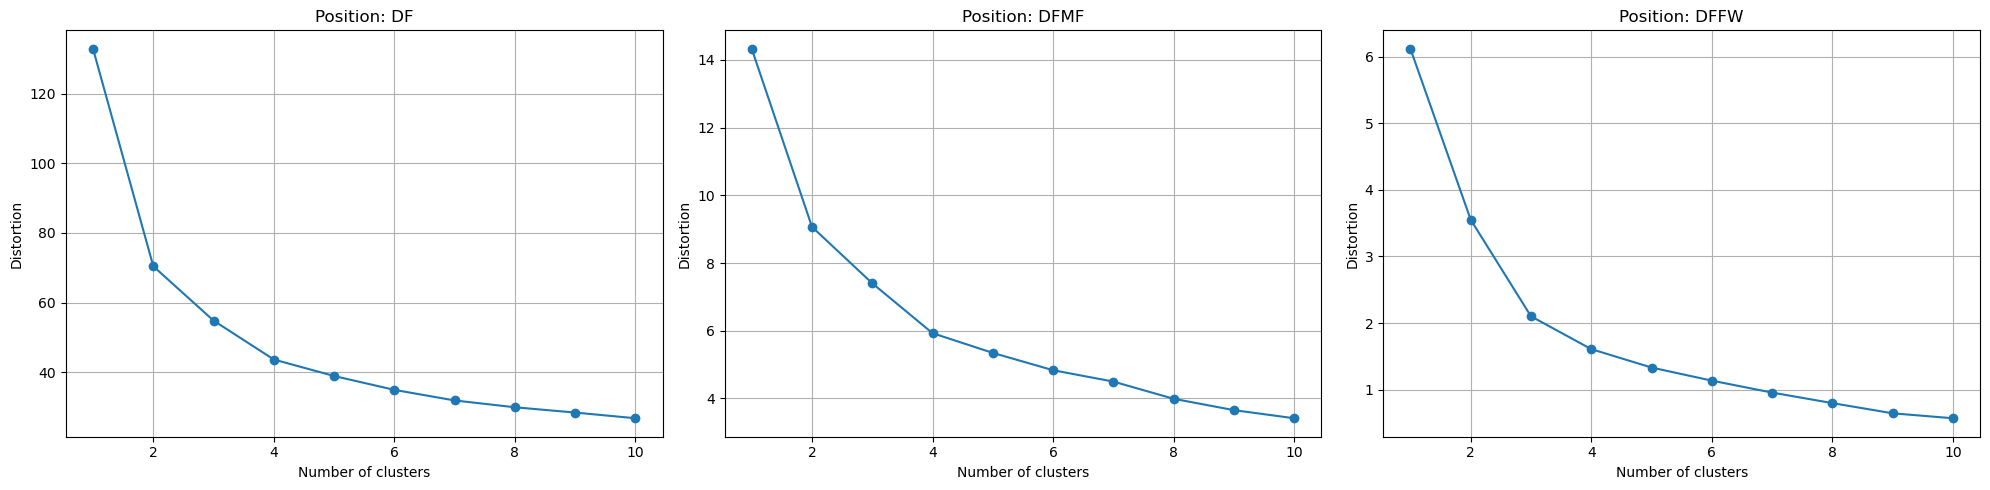

In [25]:
position = [forward_position, midfield_position, defender_position]
for j in range(len(position)):
    fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20,5))
    for i in range(3):
        distortions = []
        for n_clusters in range(1, 11):
            kmeans = KMeans(n_clusters=n_clusters, n_init=20, init='k-means++', random_state=1)
            kmeans.fit(df_radar[df_radar["Pos"] == position[j][i]][forward_features])
            distortions.append(kmeans.inertia_)

        axes[i].plot(range(1, 11), distortions, marker='o')
        axes[i].set_xlabel('Number of clusters')
        axes[i].set_ylabel('Distortion')
        axes[i].set_title('Position: ' + position[j][i])
        axes[i].grid(True)

    plt.tight_layout()
    plt.show()

Since k=2 is too small for my liking, I will choose 3.

In [26]:
N_CLUSTERS = 3
def kmeans_position(df, position, cluster, features):
    '''
    Train a KMeans model to cluster players at each position
    '''
    kmeans = KMeans(n_clusters=cluster, init='k-means++', n_init=10, random_state=1)
    df_position = df[(df["Pos"]==position)]
    kmeans.fit(df_position[features])
    position_pred = kmeans.predict(df_position[features])
    df_position.loc[:, "Class"] = position_pred
    silhouette_avg = silhouette_score(df_position[features], position_pred)
    return df_position, silhouette_avg

def kmeans_general_position(df, general_position, cluster, features):
    '''
    Train a KMeans model to cluster players at each general position
    like striker, midfield, defender, or goalkeeper
    '''
    df_positions = []
    silhouette_avg_list = []
    for i in range(len(general_position)):
        df_position, silhouette_avg = kmeans_position(df, general_position[i], cluster, features)
        df_positions.append(df_position)
        silhouette_avg_list.append(silhouette_avg)
    return df_positions, silhouette_avg_list

df_striker, striker_silhouette_avg_list = kmeans_general_position(df_radar, forward_position, N_CLUSTERS, forward_features)
df_midfield, midfield_silhouette_avg_list = kmeans_general_position(df_radar, midfield_position, N_CLUSTERS, midfielder_features)
df_defender, defender_silhouette_avg_list = kmeans_general_position(df_radar, defender_position, N_CLUSTERS, defender_features)

/tmp/ipykernel_20/3294517196.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_position.loc[:, "Class"] = position_pred
/tmp/ipykernel_20/3294517196.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_position.loc[:, "Class"] = position_pred
/tmp/ipykernel_20/3294517196.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs

In [27]:
print(np.mean(striker_silhouette_avg_list))
print(np.mean(midfield_silhouette_avg_list))
print(np.mean(defender_silhouette_avg_list))

0.23233716637849514
0.1955247852569245
0.23345055129870773


In [28]:
df_striker = pd.concat(df_striker, axis=0)
df_midfield = pd.concat(df_midfield, axis=0)
df_defender = pd.concat(df_defender, axis=0)

In [29]:
df_radar = pd.concat([df_striker, df_midfield, df_defender], axis=0)

We add the Class column to df_players

In [30]:
class_column = []
position_column = []
for i in range(df_players.shape[0]):
    class_column.append(df_radar[df_radar["Player"] == df_players.iloc[i,0]]["Class"].values[0])
    position_column.append(df_radar[df_radar["Player"] == df_players.iloc[i,0]]["Pos"].values[0])

In [31]:
df_players["Class"] = class_column
df_players["Pos"] = position_column

In [32]:
del df_striker
del df_midfield
del df_defender

In [33]:
df_players.to_csv("players.csv")

In [34]:
df_radar.to_csv("radar.csv")

# EDA 2

In [35]:
def plot_class(position, features, playing_time, max_value, df):
    for i in range(len(position)):
        fig, axes = plt.subplots(nrows=1, ncols=N_CLUSTERS, figsize=(60,10))
        for j in range(N_CLUSTERS):
            data = df[(df["Class"] == j) & (df["Pos"] == position[i])][features].mean()
            data_dict = dict(data)
            data = pd.DataFrame.from_dict(data_dict, orient='index', columns=['Mean Value'])
            axes[j].bar(data.index, data['Mean Value'])
            axes[j].set_xticks(range(len(data)))
            axes[j].set_xticklabels(data.index, rotation=90)
            axes[j].set_title(position[i] + " vs " + str(j))
            axes[j].set_yticks(np.arange(0, max_value + 0.1, 0.1))
            print("-")
            print(df[(df["Class"] == j) & (df["Pos"] == position[i])][playing_time].mean())
            print("Number of players: " + str(df[(df["Class"] == j) & (df["Pos"] == position[i])].shape[0]))
            print("-")
        plt.show()

-
MP        0.355307
Starts    0.238758
Min       0.287883
dtype: float64
Number of players: 171
-
-
MP        0.455186
Starts    0.404565
Min       0.466077
dtype: float64
Number of players: 142
-
-
MP        0.062593
Starts    0.028830
Min       0.041346
dtype: float64
Number of players: 61
-


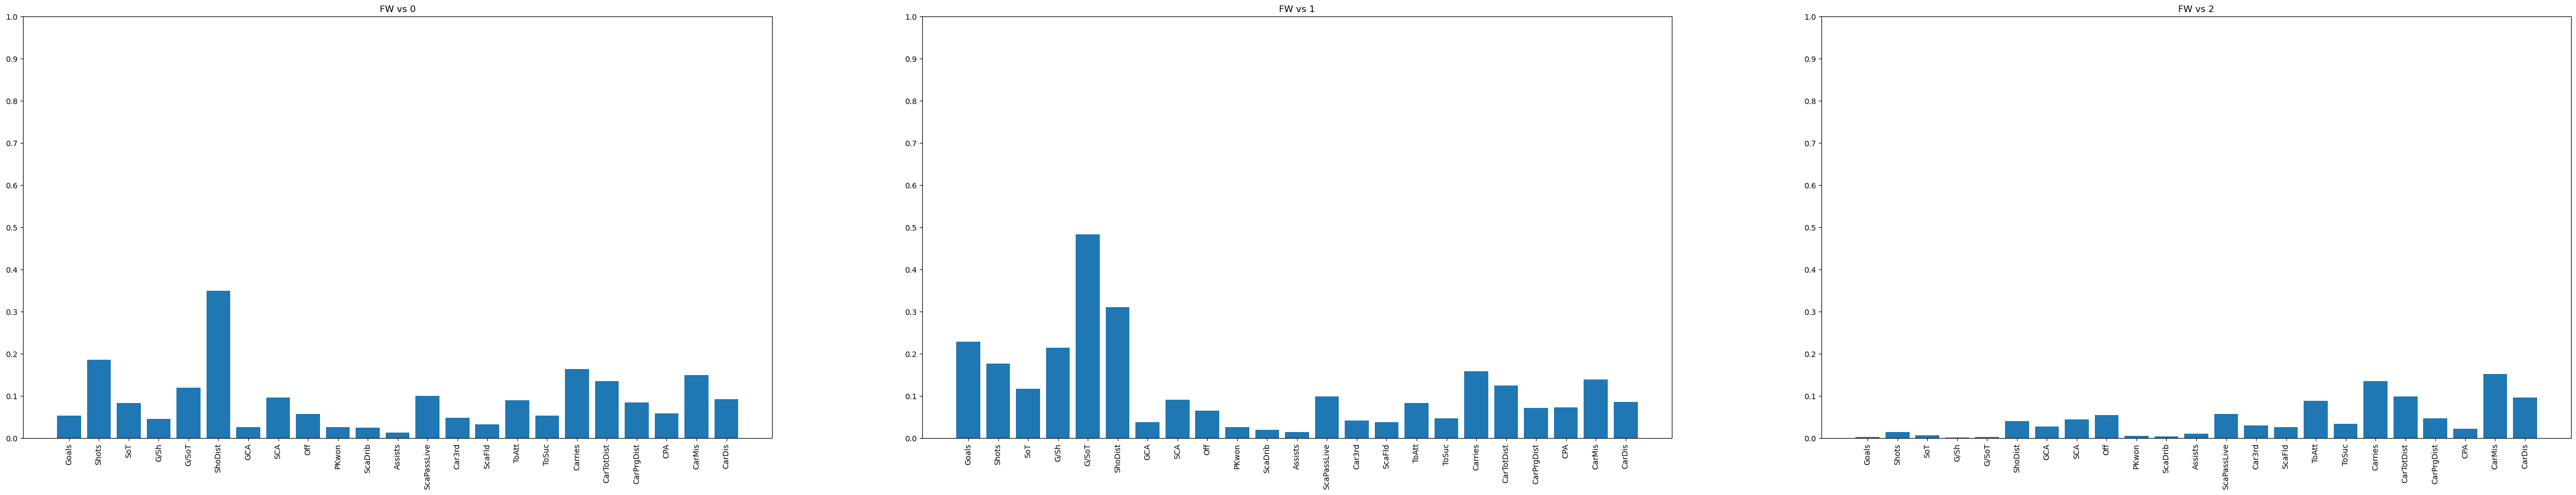

-
MP        0.307139
Starts    0.189071
Min       0.236887
dtype: float64
Number of players: 118
-
-
MP        0.451997
Starts    0.328392
Min       0.393527
dtype: float64
Number of players: 107
-
-
MP        0.030303
Starts    0.000000
Min       0.004552
dtype: float64
Number of players: 1
-


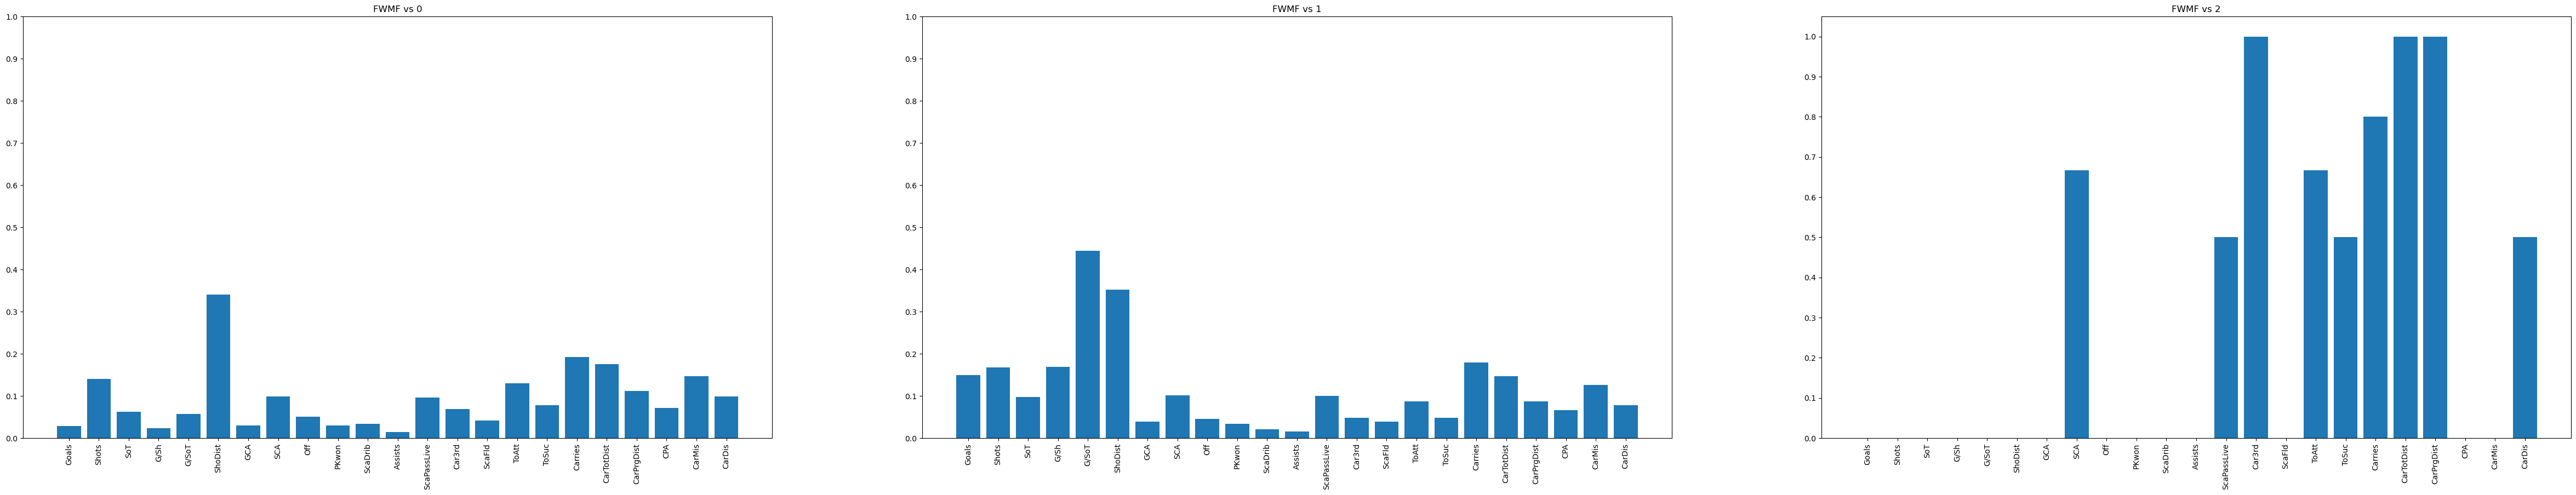

-
MP        0.291375
Starts    0.143236
Min       0.190505
dtype: float64
Number of players: 13
-
-
MP        0.173160
Starts    0.098522
Min       0.120034
dtype: float64
Number of players: 7
-
-
MP        0.420875
Starts    0.360153
Min       0.411116
dtype: float64
Number of players: 9
-


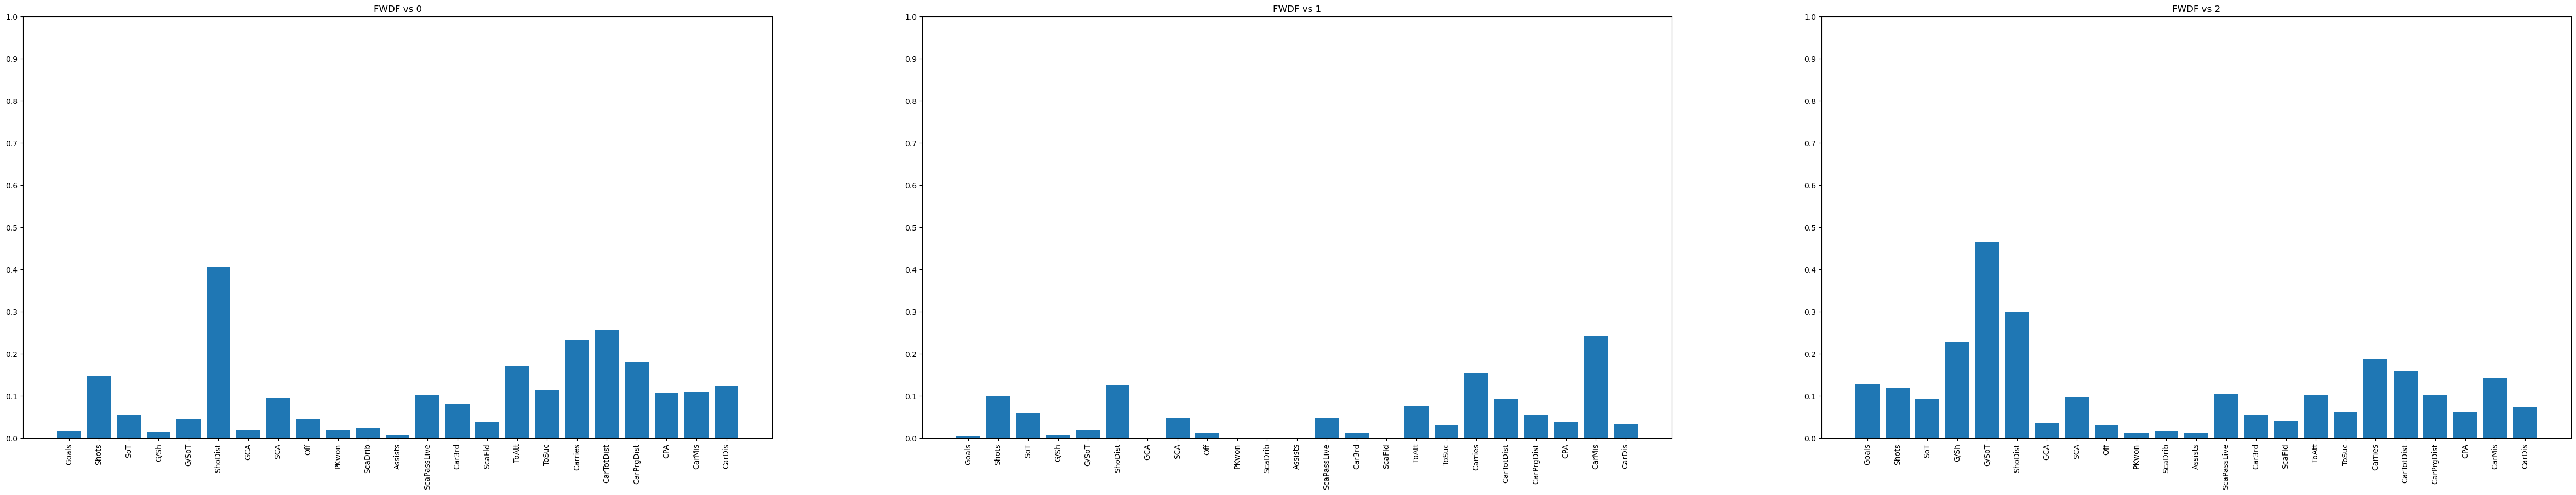

In [36]:
plot_class(forward_position,forward_features, playing_time, 1, df_radar)

-
MP        0.408128
Starts    0.356476
Min       0.413454
dtype: float64
Number of players: 299
-
-
MP        0.405352
Starts    0.359606
Min       0.421847
dtype: float64
Number of players: 154
-
-
MP        0.155502
Starts    0.119782
Min       0.137201
dtype: float64
Number of players: 114
-


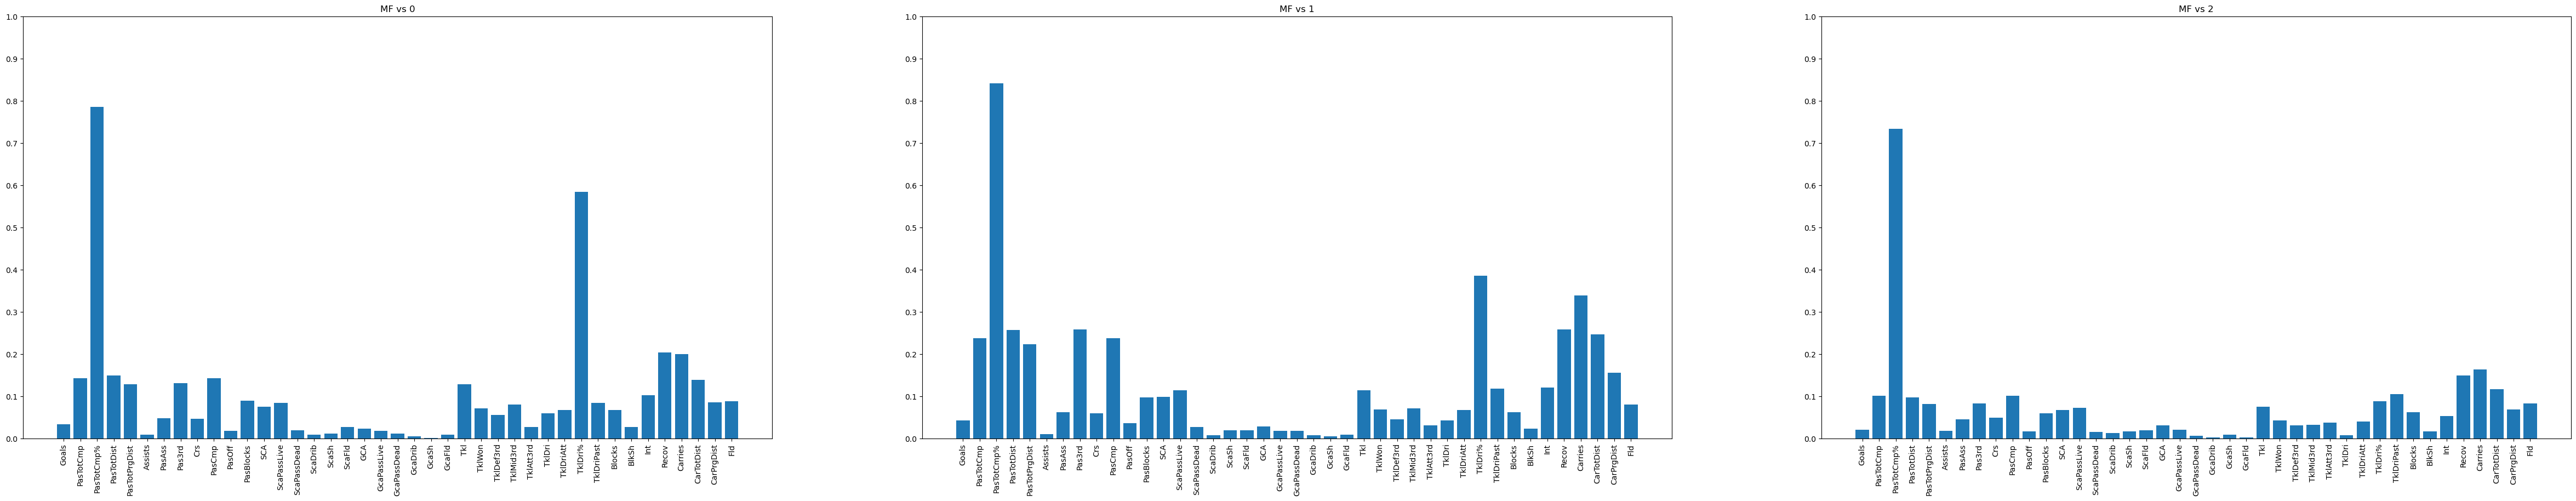

-
MP        0.030303
Starts    0.000000
Min       0.005462
dtype: float64
Number of players: 1
-
-
MP        0.195960
Starts    0.068966
Min       0.102928
dtype: float64
Number of players: 15
-
-
MP        0.374207
Starts    0.297514
Min       0.355686
dtype: float64
Number of players: 43
-


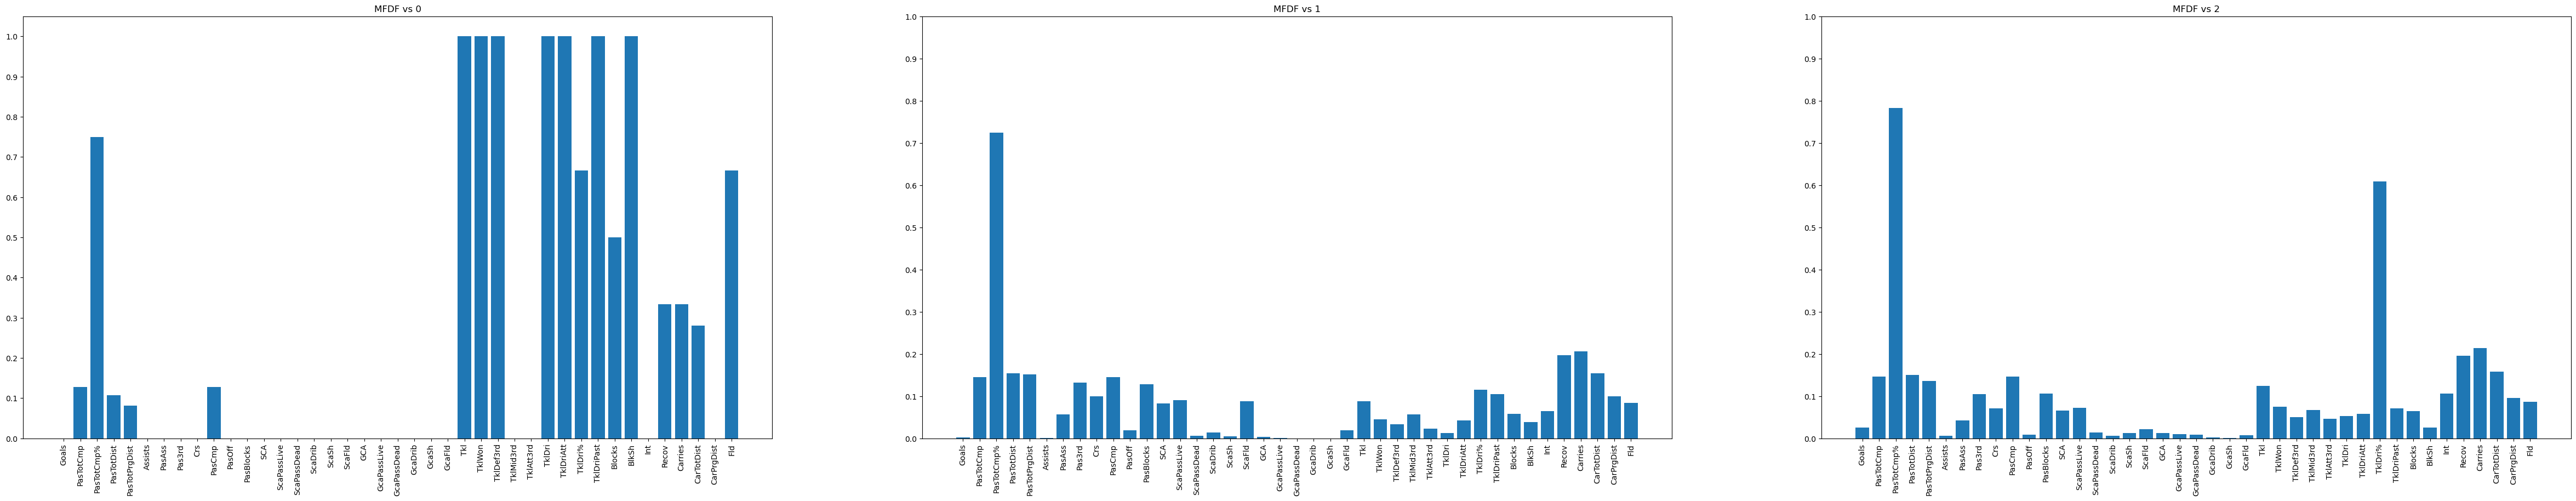

-
MP        0.384521
Starts    0.256291
Min       0.317159
dtype: float64
Number of players: 74
-
-
MP        0.441212
Starts    0.368966
Min       0.425416
dtype: float64
Number of players: 50
-
-
MP        0.302211
Starts    0.208295
Min       0.255084
dtype: float64
Number of players: 74
-


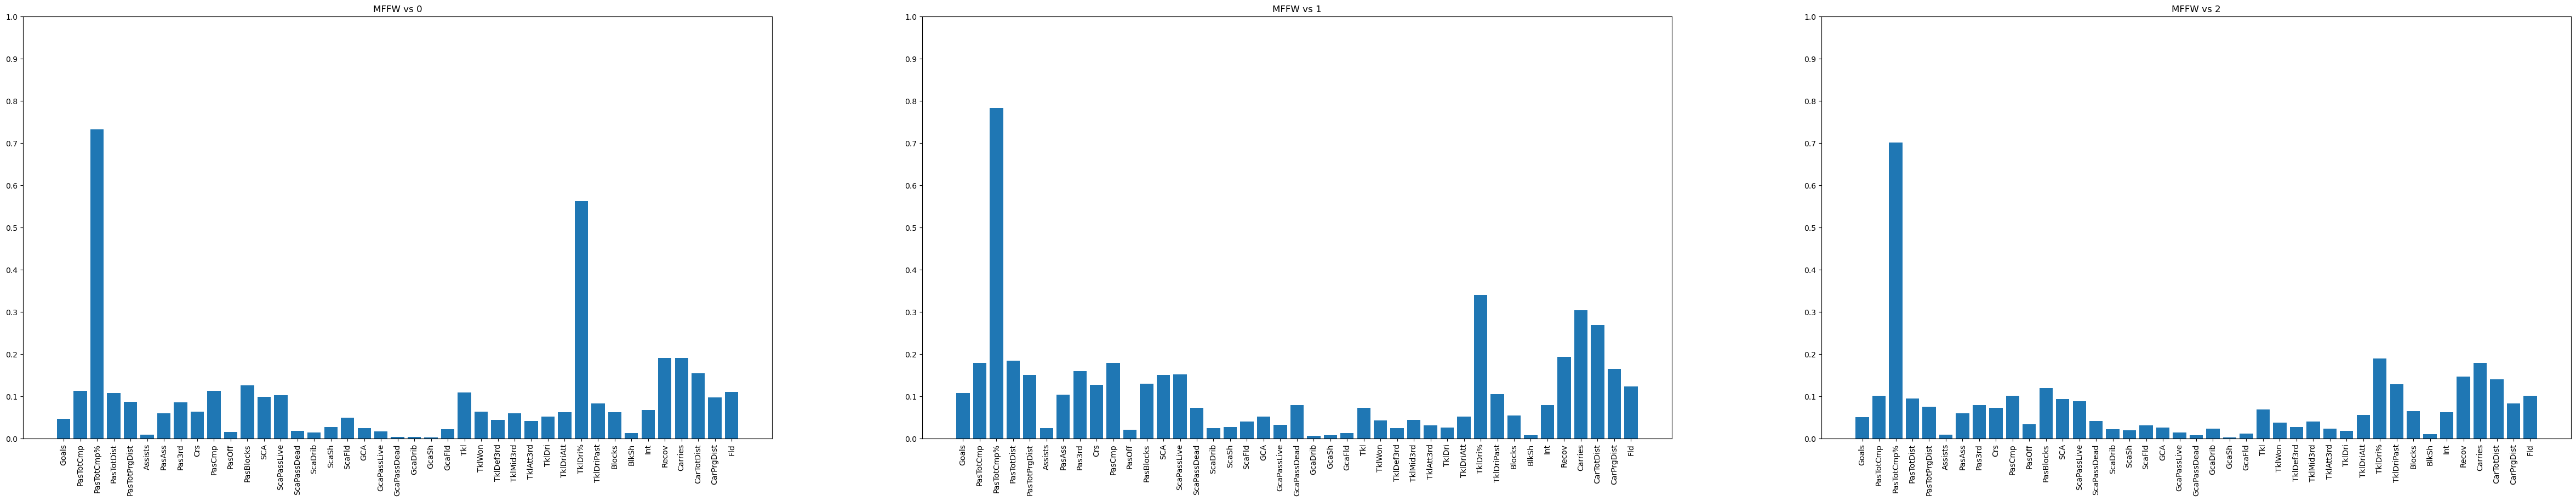

In [37]:
plot_class(midfield_position, midfielder_features, playing_time, 1, df_radar)

In [38]:
df_radar[(df_radar["Pos"]=="DF") & (df_radar["Class"]==0)][defender_features].mean()

PasTotCmp        0.478404
PasTotDist       0.588300
PasTotPrgDist    0.651301
Tkl              0.188500
TklWon           0.094250
TklDef3rd        0.138875
TklMid3rd        0.066167
TklAtt3rd        0.000000
TklDri           0.112125
TklDriAtt        0.074750
TklDriPast       0.000000
Blocks           0.000000
BlkSh            0.000000
Int              0.557500
Tkl+Int          0.467250
Recov            0.578667
AerWon           0.268200
AerLost          0.018500
Carries          0.653167
CarTotDist       0.635771
CarPrgDist       0.546218
CrdY             0.000000
CrdR             0.000000
Fls              0.267875
Clr              0.045625
dtype: float64

In [39]:
df_radar[(df_radar["Pos"]=="DF") & (df_radar["Class"]==2)][defender_features].mean()

PasTotCmp        0.233925
PasTotDist       0.271594
PasTotPrgDist    0.287969
Tkl              0.084919
TklWon           0.047935
TklDef3rd        0.051110
TklMid3rd        0.036331
TklAtt3rd        0.013133
TklDri           0.043285
TklDriAtt        0.046257
TklDriPast       0.052189
Blocks           0.058348
BlkSh            0.053374
Int              0.119164
Tkl+Int          0.144485
Recov            0.201210
AerWon           0.071489
AerLost          0.042002
Carries          0.309424
CarTotDist       0.228523
CarPrgDist       0.172666
CrdY             0.019475
CrdR             0.001749
Fls              0.046433
Clr              0.147613
dtype: float64

-
MP        0.022727
Starts    0.017241
Min       0.019572
dtype: float64
Number of players: 4
-
-
MP        0.318213
Starts    0.319880
Min       0.376430
dtype: float64
Number of players: 481
-
-
MP        0.380751
Starts    0.401535
Min       0.472887
dtype: float64
Number of players: 301
-


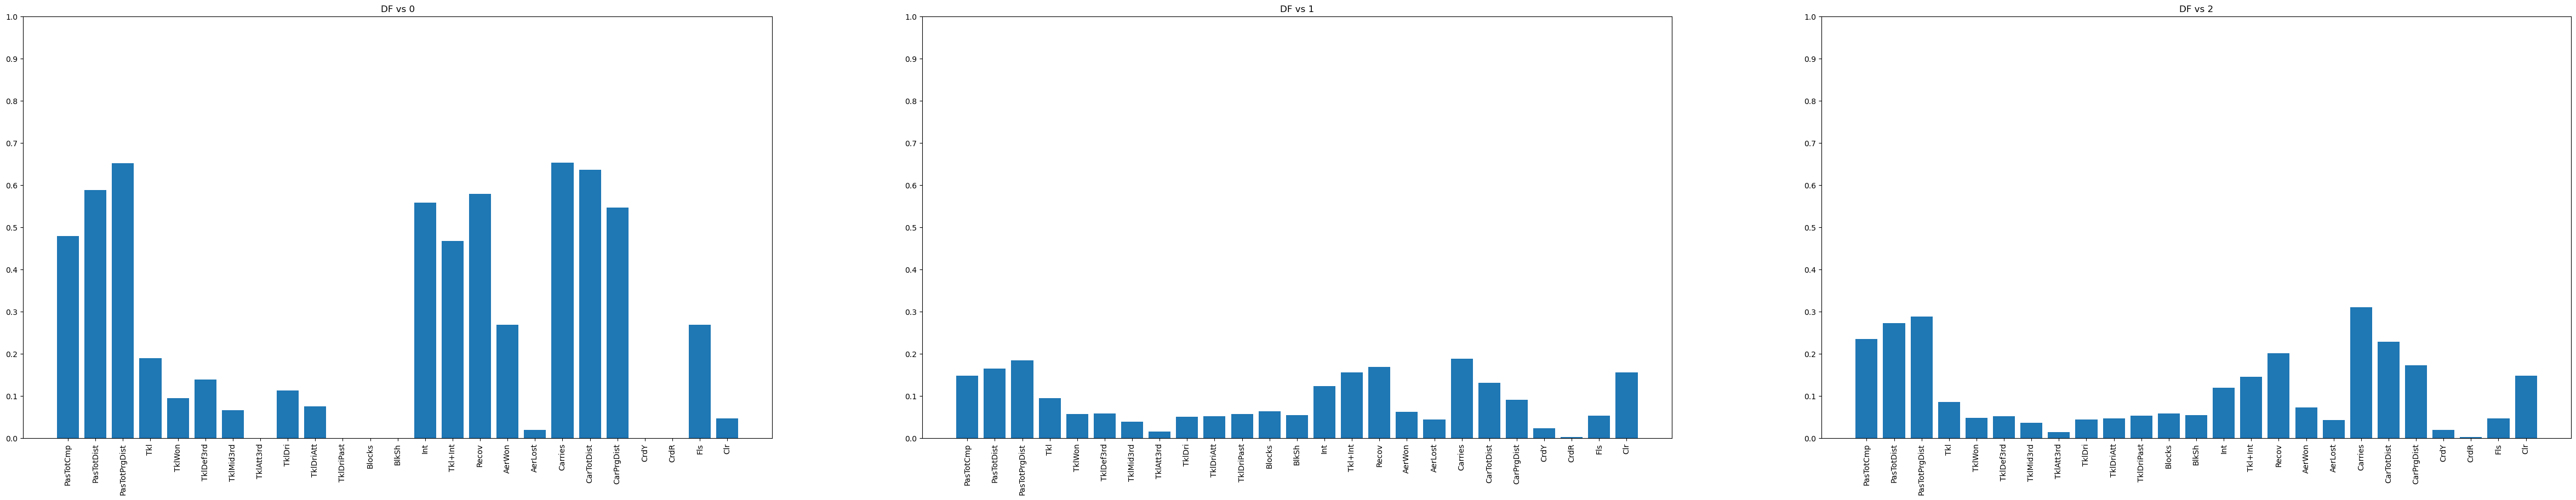

-
MP        0.340741
Starts    0.273563
Min       0.331897
dtype: float64
Number of players: 45
-
-
MP        0.326203
Starts    0.249493
Min       0.308335
dtype: float64
Number of players: 17
-
-
MP        0.347594
Starts    0.263692
Min       0.326876
dtype: float64
Number of players: 34
-


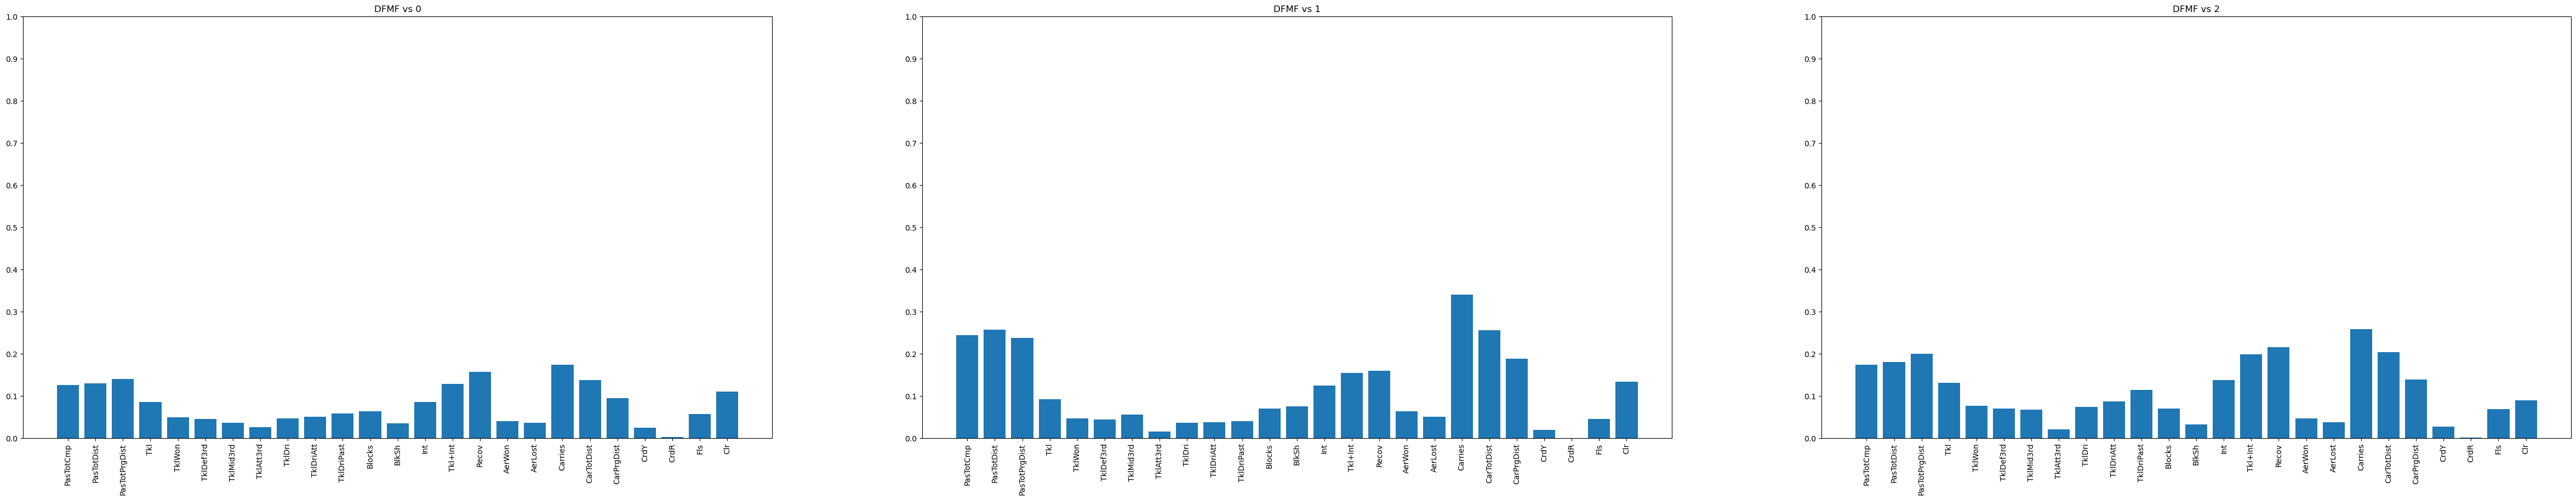

-
MP        0.136364
Starts    0.000000
Min       0.028675
dtype: float64
Number of players: 2
-
-
MP        0.369906
Starts    0.290131
Min       0.341657
dtype: float64
Number of players: 29
-
-
MP        0.151515
Starts    0.041379
Min       0.070642
dtype: float64
Number of players: 5
-


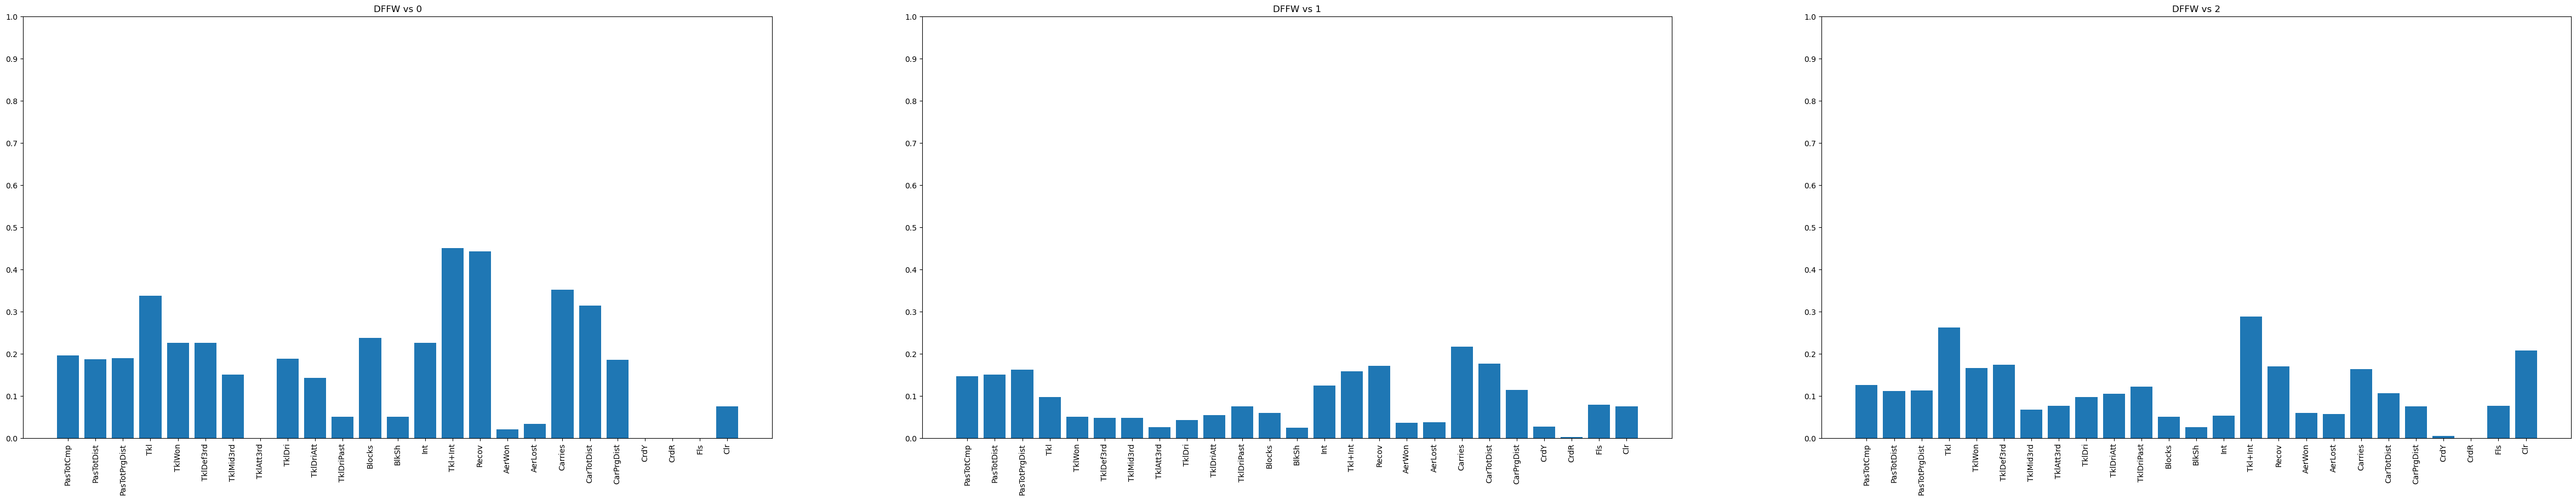

In [40]:
plot_class(defender_position, defender_features, playing_time, 1, df_radar)

Base on these, by doing eye test I come up with the following ranking for each position

In [41]:
forward_legends = ["Well rounded forward", "Goal scorer", "Ball carrier", "Injury Prone / Subs"]
mdifield_legends = ["Dynamic midfielder", "Attacking midfielder", "Holding midfielder", "Injury Prone / Subs"]
defender_legends = ["World class defender", "Great defender", "Injury Prone / Subs"]

ranking_dict = {
    "FW": [0, 1, 3],
    "FWMF": [0, 1, 3],
    "FWDF": [0, 2, 1],
    "MF": [1, 0, 1],
    "MFDF": [3, 1, 2],
    "MFFW": [1, 1, 1],
    "DF":[2, 0, 1],
    "DFMF": [1, 2, 1],
    "DFFW": [2, 1, 0]
}

In [42]:
color_ranking = ["red", "steelblue", "green", "gold"]

red_color = ["Injury Prone / Subs"]
steelblue_color = ["Ball carrier", "Holding midfielder"]
green_color = ["Goal scorer", "Attacking midfielder", "Great defender"]
gold_color = ["Well rounded forward", "Dynamic midfielder", "World class defender"]

# Plotting

In [43]:
def get_info(player_name, attribute, df):
    '''
    Get information attribute given the player name and a list of attributes
    '''
    if player_name not in all_players:
        return "No player found"
    
    player_position = list(df[df["Player"] == player_name]["Pos"].values)[0]
    class_ranking = ranking_dict[player_position]
    player_class = list(df[df["Player"] == player_name]["Class"].values)[0]
    player_legened = class_ranking[player_class]
    color = 0
    player_category = ""
    if player_position == "FW":
        player_category = forward_legends[player_legened]
    if player_position == "MF":
        player_category = forward_legends[player_legened]
    if player_position == "DF":
        player_category = forward_legends[player_legened]
    
    if player_category in "red_color":
        color = 0
    elif player_category in "steelblue_color":
        color = 1
    elif player_category in "green":
        color = 2
    else:
        color = 3
    
    return df[df["Player"] == player_name][attribute], color

def attribute_description(attribute):
    '''
    Get the description of each attribute inside the list
    '''
    description = []
    for i in range(len(attribute)):
        description.append(acronyms[attribute[i]])
    return description

def plot_players_right(player_name, attribute, df):
    '''
    Plot the player attribute given the player name, attribute, and desired year
    '''
    
    if player_name not in all_players:
        return "No player found"

    player, color = get_info(player_name, attribute, df)
    description = attribute_description(attribute)
    
    print(len(player.values[0]))
    print(len(player.values[0]))
    
    fig = go.Figure(go.Bar(
            x=player.values[0],
            y=description,
            orientation='h',
            marker=dict(
            color=color_ranking[color],
            line=dict(color='black', width=0.5)
        )))
    
    fig.update_layout(
        yaxis_title="Features",
        xaxis=dict(side='top'),
        plot_bgcolor='rgba(0,0,0,0)',
        bargap=0.2
    )
    
    fig.show()
    
def plot_players_left(player_name, attribute, df):
    '''
    Plot the player attribute given the player name, attribute, and desired year
    '''
    
    if player_name not in all_players:
        return "No player found"
    
    player, color = get_info(player_name, attribute, df)
    description = attribute_description(attribute)
    
    fig = go.Figure(go.Bar(
            x=player.values[0],
            y=description,
            orientation='h',
            marker=dict(
            color=color_ranking[color],
            line=dict(color='black', width=0.5)
        )))

    fig.update_layout(
        xaxis = dict(side='top', range=[max(player.values[0]), 0]),
        yaxis = dict(side='right'),
        plot_bgcolor='rgba(0,0,0,0)',
        bargap=0.2,)

    fig.show()

def plot_radar(player_name,df):
    '''
    Plot radar chart
    '''
    
    if player_name not in all_players:
        return "No player found"
    
    player_info, color = get_info(player_name, goals_bestfeatures + passes_bestfeatures + skill_bestfeatures + defense_bestfeatures, df)
    
    new_column = attribute_description(player_info.columns)
    player_info.columns = new_column
    
    fig = px.line_polar(player_info, r=list(player_info.values[0]), theta=list(player_info.columns), line_close=True)
    fig.update_layout(polar=dict(radialaxis=dict(range=[0, 1], showticklabels=False)), plot_bgcolor='white')
    fig.update_traces(fill='toself', fillcolor=color_ranking[color], line_color='black', opacity=0.8)
    fig.show()

In [44]:
plot_players_right("Kylian Mbappé", forward_features, df_players)

23
23


In [45]:
plot_radar("Kylian Mbappé", df_radar)

/opt/conda/lib/python3.10/site-packages/plotly/express/_core.py:271: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



In [46]:
plot_players_left("Erling Haaland", forward_features, df_players)

In [47]:
plot_radar("Erling Haaland", df_radar)

/opt/conda/lib/python3.10/site-packages/plotly/express/_core.py:271: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



# Similar player profile

In [48]:
def similar_players(player_name, attribute, df):
    player_info, color = get_info(player_name, attribute + ["Player"], df)
    cosine_matrix = pd.DataFrame(cosine_similarity(df[attribute]))
    cosine_matrix.reset_index(inplace=True, drop=True)
    df_full = pd.concat([df["Player"], cosine_matrix], axis=1)
    
    player_name_list = list(df_full["Player"].values)
    player_coef = list(df_full[df_full["Player"]==player_name].values[0])[1:]
    player_sorted = sorted(zip(player_name_list, player_coef), key=lambda x: x[1], reverse=True)
    
    return player_sorted

In [49]:
similar_players("Lionel Messi", playing_time + forward_features + midfielder_features + defender_features, df_radar)[:10]

[('Dimitri Payet', 0.9999999999999994),
 ('Ángel Di María', 0.9686869580797288),
 ('Ruslan Malinovskyi', 0.9612495953746892),
 ('Lazar Samardzic', 0.9609818904029795),
 ('Matteo Politano', 0.9590158916536957),
 ('Gerard Deulofeu', 0.9556341557676871),
 ('Sofiane Boufal', 0.9540400198272982),
 ('Raphinha', 0.9527951068567068),
 ('Dominik Szoboszlai', 0.9513337187563127),
 ('Marco Asensio', 0.9505118720414351)]

# AI Analysis

In [50]:
openai.api_key = "KEY"

In [51]:
def player_to_text(player1, player2, attribute):
    player1_text = ""
    player2_text = ""
    for i in range(len(list(df_players[general_info + attribute].columns))):
        player1_text += str(list(df_players[df_players["Player"] == player1][general_info + attribute].columns)[i]) + ": "
        player1_text += str(df_players[df_players["Player"] == player1][general_info + attribute].values[0][i]) + ", "
        player1_text += str(list(df_players[df_players["Player"] == player2][general_info + attribute].columns)[i]) + ": "
        player1_text += str(df_players[df_players["Player"] == player2][general_info + attribute].values[0][i]) + ", "
    return player1_text, player2_text

def compare_stats_between_examples(player1, player2):
    prompt = f"Write an analysis about some of the main given attributes between the following two football players:\n1. {player1}\n2. {player2}\n"
    response = openai.Completion.create(
        engine="text-davinci-002",
        prompt=prompt,
        max_tokens=1500
    )

    return response